## Importing libaries and files

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import json
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
from sams.utils import load_data
from sams.config import datasets

2025-09-22 11:05:16.819 | INFO     | sams.config:<module>:15 - PROJ_ROOT path is: C:\Users\Admin\Documents\GitHub\sams
2025-09-22 11:05:16.891 | WARNING  | sams.config:<module>:83 - Google MAPS API key not found, using Nominatim geocoder
2025-09-22 11:05:16.894 | INFO     | sams.config:<module>:92 - Loaded 0 geocodes from cache


In [3]:
iti_enrollment = load_data(datasets["iti_institutes_cutoffs"])

2025-08-19 08:30:41.784 | INFO     | sams.utils:load_data:70 - Loading data from C:\Users\Admin\Documents\GitHub\sams\data\interim\iti_institutes_cutoffs.pq


In [3]:
# Use the path from datasets metadata 
db_path = datasets["sams"]["path"]
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables:", [t[0] for t in tables])

cursor.close()
conn.close()

Tables: ['students', 'institutes']


In [5]:
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Function to show column names of a table
def describe_table(table_name):
    try:
        print(f"\nVariable of the table: {table_name}")
        cursor.execute(f"PRAGMA table_info({table_name});")
        columns = cursor.fetchall()
        for col in columns:
            print(f"{col[1]} ({col[2]})")
    except sqlite3.Error as e:
        print(f"Error describing table {table_name}: {e}")


# Describe both tables
describe_table("students")

conn.close()


Variable of the table: students
id (INTEGER)
barcode (VARCHAR)
student_name (VARCHAR)
gender (VARCHAR)
religion_name (VARCHAR)
dob (VARCHAR)
nationality (VARCHAR)
annual_income (VARCHAR)
address (VARCHAR)
state (VARCHAR)
district (VARCHAR)
block (VARCHAR)
pin_code (VARCHAR)
social_category (VARCHAR)
domicile (VARCHAR)
s_domicile_category (VARCHAR)
outside_odisha_applicant_state_name (VARCHAR)
odia_applicant_living_outside_odisha_state_name (VARCHAR)
residence_barcode_number (VARCHAR)
tenth_exam_school_address (VARCHAR)
eighth_exam_school_address (VARCHAR)
highest_qualification (VARCHAR)
had_two_year_full_time_work_exp_after_tenth (VARCHAR)
gc (VARCHAR)
ph (VARCHAR)
es (VARCHAR)
sports (VARCHAR)
national_cadet_corps (VARCHAR)
pm_care (VARCHAR)
orphan (VARCHAR)
income_barcode (VARCHAR)
tfw (VARCHAR)
ews (VARCHAR)
boc (VARCHAR)
boc_regd_no (VARCHAR)
course_name (VARCHAR)
course_period (VARCHAR)
beauty_culture_type (VARCHAR)
sams_code (VARCHAR)
reported_institute (VARCHAR)
reported_branch

In [ ]:
# # Connect to the database
# conn = sqlite3.connect(db_path)
# cursor = conn.cursor()

# # Delete rows for DEG module in 2021
# print("Deleting rows start")
# cursor.execute("DELETE FROM students WHERE module = 'ITI' AND academic_year = 2017")

# # Commit and close
# conn.commit()
# cursor.close()
# conn.close()

# print("Removed")

In [ ]:
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

query = """
SELECT 
    module,
    academic_year,
    COUNT(*) AS count_students
FROM students
WHERE module = "Diploma"
GROUP BY module, academic_year
ORDER BY module, academic_year;
"""

cursor.execute(query)
rows = cursor.fetchall()

for row in rows:
    print(f"Module: {row[0]}, Year: {row[1]}, Count: {row[2]}")

cursor.close()
conn.close()


Module: ITI, Year: 2017, Count: 35237
Module: ITI, Year: 2018, Count: 75211
Module: ITI, Year: 2019, Count: 64148
Module: ITI, Year: 2020, Count: 67415
Module: ITI, Year: 2021, Count: 81950
Module: ITI, Year: 2022, Count: 74104
Module: ITI, Year: 2023, Count: 92085
Module: ITI, Year: 2024, Count: 83958


In [ ]:
conn = sqlite3.connect(db_path)

query = """
SELECT year,
       COUNT(DISTINCT aadhar_no) AS count
FROM students
WHERE module = 'ITI'
  AND (option_data IS NULL OR TRIM(option_data) = '[]')
GROUP BY year
ORDER BY year;
"""

result = pd.read_sql_query(query, conn)
print(result)

In [ ]:
conn = sqlite3.connect(db_path)

columns = [
    "aadhar_no", "barcode", "gender", "dob", "date_of_application",
    "academic_year", "module", "year", "course_name", "course_period",
    "reported_institute", "reported_branch_or_trade", "institute_district",
    "type_of_institute", "sams_code"
]

select_clause = ",\n    ".join(
    [f"SUM(CASE WHEN {col} IS NULL THEN 1 ELSE 0 END) AS {col}" for col in columns]
)

query = f"""
SELECT
    {select_clause}
FROM students;
"""
missing_df = pd.read_sql_query(query, conn)

# Reshape to two-column table
missing_df = missing_df.T.reset_index()
missing_df.columns = ['column_name', 'missing_values']
missing_df

In [4]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(db_path)

query = """
SELECT
    barcode,
    module,
    mark_data
FROM students
WHERE academic_year = 2020
  AND module IN ('ITI', 'Diploma')
LIMIT 100;
"""

students_df = pd.read_sql_query(query, conn)
conn.close()

students_df.head()


,barcode,module,mark_data
0,20T0010235,ITI,"[{""ExamName"": ""10th Pass"", ""YearofPassing"": ""2..."
1,20T0277276,ITI,"[{""ExamName"": ""10th Pass"", ""YearofPassing"": ""2..."
2,20T0131257,ITI,"[{""ExamName"": ""10th Pass"", ""YearofPassing"": ""2..."
3,20T0173076,ITI,"[{""ExamName"": ""10th Pass"", ""YearofPassing"": ""2..."
4,20T0098774,ITI,"[{""ExamName"": ""10th Pass"", ""YearofPassing"": ""2..."


In [7]:
conn = sqlite3.connect(db_path)

query = """
SELECT
    barcode,
    aadhar_no,
    gender,
    dob,
    annual_income,
    state,
    district,
    social_category,
    domicile,
    date_of_application,
    academic_year,
    year,
    course_name,
    course_period,
    reported_institute,
    reported_branch_or_trade,
    institute_district,
    type_of_institute,
    highest_qualification,
    gc,
    ph,
    es,
    sports,
    national_cadet_corps,
    orphan,
    ews,
    admission_status,
    enrollment_status,
    phase,
    option_data
FROM students
WHERE module = 'ITI';
"""

students_df = pd.read_sql_query(query, conn)
conn.close()

students_df.head()

,barcode,aadhar_no,gender,dob,annual_income,state,district,social_category,domicile,date_of_application,...,ph,es,sports,national_cadet_corps,orphan,ews,admission_status,enrollment_status,phase,option_data
0,17T0190772,YTdJgeEX26Ycl8mWb7DRsqB0vInZx4lhMXfrErnJWww=,Male,18-Apr-2000,"0-1,00,000",Odisha,Koraput,General,NA,02-Jun-2017,...,No,No,No,NA,No,NA,No,No,None,"[{""Phase"": ""1"", ""Option_No"": ""1"", ""Institute_N..."
1,17T0434532,wlVLDFUWK3hDq+vrDsBrm1vx/vIUcsRP7yOmovfNifc=,Male,25-Sep-2000,"0-1,00,000",Odisha,Ganjam,General,NA,07-Aug-2017,...,No,No,No,NA,No,NA,No,No,3,[]
2,17T0027371,sw3lT4m+IzLB9rR0/OpnaLHzQ8awDrka3wEhV5E66+o=,Male,21-Aug-2000,"0-1,00,000",Odisha,Ganjam,General,NA,18-May-2017,...,No,No,No,NA,No,NA,No,No,None,"[{""Phase"": ""1"", ""Option_No"": ""1"", ""Institute_N..."
3,17T0226786,TMVw1mhm4RV5Eu5DBl4gA6Nj4IHRFO5NOinaW0UzmDU=,Male,30-Dec-1999,"0-1,00,000",Odisha,Nawarangpur,General,NA,03-Jun-2017,...,No,No,No,NA,No,NA,No,No,None,"[{""Phase"": ""1"", ""Option_No"": ""1"", ""Institute_N..."
4,17T0396388,cZW0K+d+n1BtgE8hKccHc8GKTb+C2RQuQ6frztdhhBw=,Male,24-Mar-2000,OTHER,Odisha,Ganjam,General,NA,24-Jul-2017,...,No,No,No,NA,No,NA,No,No,None,"[{""Phase"": ""1"", ""Option_No"": ""1"", ""Institute_N..."


In [8]:
institution_dictionary = {
    "govt": [
        'ITI Talcher, Anugul',
        'ITI Balasore',
        'ITI Bargarh',
        'ITI Bheden, Bargarh',
        'ITI Bolangir',
        'Gandhamardana ITI, Bolangir',
        'ITI Boudh',
        'ITI Cuttack',
        'Madhusudan ITI, Cuttack',
        'ITI Barkote, Deogarh',
        'ITI Dhenkanal',
        'ITI Gumma, Gajapati',
        'ITI Chandragiri, Gajapati',
        'ITI Raigada, Gajapati',
        'ITI Chhatrapur, Ganjam',
        'ITI Hinjilcut, Ganjam',
        'ITI Purusottampur, Ganjam',
        'ITI Berhampur, Ganjam',
        'ITI Jajpur',
        'ITI Jharsuguda',
        'ITI Bhawanipatna, Kalahandi',
        'ITI Phulbani, Kandhamal',
        'SIPT Pattamundai, Kendrapada',
        'ITI Anandapur, Keonjhar',
        'ITI Barbil, Keonjhar',
        'ITI Bhubaneswar, Khurda',
        'Special ITI for PWD, Jatni, Khurda',
        'Gopabandhu ITI Ambaguda Koraput',
        'ITI Kotpad, Koraput',
        'ITI Laxmipur, Koraput',
        'ITI Patangi, Koraput',
        'ITI Malkangiri',
        'ITI Matheli, Malkanagiri',
        'TTI Takatpur, Mayurbhanj',
        'ITI Chandahandi, Nabrangpur',
        'ITI Raighar, Nabrangpur',
        'ITI Umarkote, Nabrangpur',
        'ITI Nayagarh',
        'ITI Khariar, Nuapada',
        'ITI Khariar Road, Nuapada',
        'ITI,Shergarh,Ganjam',
        'ITI Puri',
        'ITI Gajabahal,Bissamcuttack, Raygada',
        'ITI Rayagada',
        'ITI Rasanpur, Sambalpur',
        'ITI Hirakud, Sambalpur',
        'ITI Sonepur',
        'ITI Rourkela, Sunderagarh',
        'Purna Chandra ITI Baripada, Mayurbhanj',
        'ITI Bhandaripokhari, Bhadrak',
        'Govt. ITI, Parjang,Dhenkanal',
        'Govt. ITI, Biramaharajpur, Subarnapur',
        'Govt. ITI, Kantabanjhi, Bolangir',
        'Govt. ITI, Krushnaprasad, Puri',
        'Govt. ITI, Nandapur, Koraput',
        'Govt. ITI, Paradeep, Jagatsinghpur',
        'Govt. ITI,Daringbadi, Kandhamal',
        'Govt. ITI,Kotagarh, Kandhamal',
        'Govt. ITI,Kutra, Sundergarh',
        'Govt ITI, Koira',
        'Govt. ITI, Kaptipada',
        'Govt. ITI, Rua',
        'Govt. ITI, Bijepur',
        'Govt. ITI, Karanjia',
        'Govt. ITI, Rajkanika',
        'Govt. ITI, Athamalik',
        'Govt. ITI, Bhanjanagar',
        'Govt. ITI, Patnagarh',
        'Govt. ITI, Balugaon',
        'Govt. ITI, Junagarh',
        'Govt. ITI, Banspal',
        'Govt. ITI, Dharmagarh',
        'Gandhmardan Govt. ITI, Titlagarh'
    ],
    "pvt": [
        'Adarsha ITC',
        'Aluminium ITC ',
        'Guru ITC',
        'OP Jindal Institute of Technology  & Skills ITC',
        'Orissa ITC',
        'Pathanisamanta ITC',
        'Shivashakti ITC',
        'Talcher Tech. Education Dev. Centre',
        'Akhandalmani ITC ',
        'Ashirwad ITC',
        'Biswanath ITC',
        'ITC, RCMS,Angul',
        'Maa Budhi ITC',
        'Shree Dhriti ITC',
        'Kaminimayee ITC',
        'Maharshi ITC',
        'Narayana Institute of Industrial Technology ITC',
        'Satyanarayan ITC',
        'Pallahara Institute of Industrial Training & Skill ITC',
        'Guru Krupa ITC',
        'Maa Hingula ITC',
        'Matru Sakti ITC',
        'Pabitra Mohan Private ITI',
        'Vasudev ITC',
        'Balasore Institute of Industrial Technology ITC',
        'Balasore Institute of Technical Studies-ITC',
        'Balasore ITC, Industrial Area  Balasore',
        'Balasore Tech. School',
        'Bansidhar Mohapatra ITC',
        'BCET ITC',
        'DAS Industrial Training Centre',
        'FAKIR MOHAN ITI P.',
        'IEMT ITC Padhuapada',
        'Institute of Engineering & Training  ITC',
        'Institute of Industrial Technology  ITC',
        'Jagadhatri ITC',
        'Jyoti ITC',
        'Modern ITC',
        'Sai ITC',
        'Swain ITC',
        'Sidheswar ITC Amarda Road',
        'Trimurti Institute of Industrial Technology ITC',
        'Baba Nikhileswar Tech. Training Centre ITC',
        'Baba Nikhireswar Technical Training  Centre',
        'Balabhadra ITC',
        'Basta ITC',
        'Kiran ITC',
        'Basulimata ITC',
        'Chittaranjan ITC ',
        'Rural Institute Of ITC',
        'Fakir Mohan ITC',
        'Digambari Devi ITC',
        'Gyan Bikash ITC',
        'Subarna Rekha ITC',
        'Dibakar Suryamani ITC',
        'Shree Sai  Private ITI',
        'Mahabir ITC',
        'Rajakishor Chandra Academy of Tech. I.T.C At - Puducherry-Nilagiri',
        'Ralisha I.T.C.',
        'Sri Guruji ITC',
        'Basanti ITC',
        'Jhadeswar ITC',
        'Lokshakti ITC',
        'Shreeram ITC',
        'Popular Institute of New Academy ITC',
        'Binori ITC',
        'Ayodhya ITC',
        'IDEA ITC',
        'Little Flower Technical institute ITC',
        'Minarani ITC',
        'Konark ITC',
        'PKA ITC',
        'Mohan Nag ITC',
        'Satyam ITC',
        'Sudhashree I.T.C.',
        'Shree Ganesh ITC',
        'Nibedita Private ITI',
        'Varrsa ITC',
        'Akankshya ITC',
        'Basudevpur ITC',
        'Birabhadra ITC',
        'Bhadrak ITC',
        'Damodar Institute of Engg. & Technology ITC',
        'ITC Charampa  Canal Road',
        'ITC BIET',
        'Jagnnath ITC',
        'Madhabananda Snehalata ITC',
        'Prafulla Chandra Inst. of Tech.ITC',
        'Raginidevi ITC',
        'Royal I.T.C.',
        'Satyasai ITC',
        'Shree Jagannath ITC',
        'Orissa  ITC',
        'Baba Rameshwar & Raghunath ITC',
        'Fakirmohan ITC',
        'Maa Rani ITC',
        'Shree Laxmi ITC ',
        'Almighty Technical Institute  ITC',
        'Dwarika Mayee Private ITI',
        'Nityananda ITC Jaynagar',
        'Purnachandra Private ITI',
        'TihidiI ITC',
        'Bina Devi Private ITI',
        'Baba Biswanath ITC',
        'KBK  ITC',
        'Sushree ITC',
        'Deogaon Institute of Industrial Technology ITC',
        'Samaleswari ITC',
        'Centurian ITC',
        'Sulochana ITC',
        'Maheswari ITC',
        'Shantidevi ITC',
        'Champanath ITC',
        'Dhabaleswar ITC',
        'ABIT ITC',
        'Cuttack ITC',
        'Khetrabasi Technical Institute',
        'Police ITC',
        'Rajdhani Private ITI',
        'Sri Guru ITC',
        'Sri Jagannath Institute of Industrial Training Centre',
        'Utkal Education Institute (UTTI -ITC)',
        'Venus ITC',
        'Ch. D. N. Mishra Memorial ITC',
        'Ganakabi Baishnaba Pani ITC At- Kothopada',
        'Regional ITC',
        'Apex Institute of Industrial Technology ITC',
        'Dadhichi ITC',
        'Radhakanta I.T.C.',
        'ASMACS ITC',
        'Institute of Science & Technology I.T.C',
        'Rambaba ITC',
        'Swami Nigamananda ITC Kendupali',
        'Anant School of Technology ITC Balisahi ',
        'Ganapati Institute of Engg.& Technology ITC',
        'Nabapravat I.T.C',
        'Saraswat ITI',
        'DRIEMS PVT. ITI',
        'Kalinga Bikash ITC',
        'Samrat ITC',
        'Shree Jagannath ITC Choudwar',
        'Kalapata ITC',
        'Deogarh ITC',
        'Swami Premananda ITC',
        'Mahatma Gandhi Technical Institute  ITC',
        'Bajirout ITC',
        'Chandrasekhar ITC',
        'Rameswar ITC',
        'Baba Kasinath ITC',
        'Kapilas ITC',
        'ITC Hindol Road',
        'ITC  Kamakhyanagar',
        'Kamakshee ITC ',
        'Gayatri ITC',
        'Parimal  Engg. ITC',
        'Swaraj ITC',
        'Jagakalia ITC',
        'Jay Ganesh ITC',
        'Parimal Engg. ITC',
        'Vivekananda ITC',
        'Gajapati ITC',
        'CENTURION PRIVATE ITI, GAJAPATI',
        'Maa Mahuri Kalua ITC',
        'Mahatma Gandhi ITC',
        'Swami Sivananda ',
        'Tara Tarini ITC',
        'SAI ITC',
        'Shree ITC',
        'Balajee Institute of Vocational Training ',
        'Kalinga ITC,Near Thakurani temple, Chhatrpur',
        'St.Joseph Technical Institute ITC',
        'Chikiti Private ITI',
        'Digapahandi Pvt. ITI',
        'Ganjam Institute of Engg. & Technology ITC',
        'Biswakarma ITC',
        'Brundaban Nayak Memorial ITC(BNM ITC',
        'Budhakendu ITC',
        'Durgadevi ITC',
        'Ganapati ITC',
        'Rajiv Memorial ITC',
        'Sri Venketeswar ITC',
        'Srinivasa ITC',
        'Techno Industrial Training Institute',
        ' Sanjay memorial Institute of Technology  ITC',
        'Jagannathprasad ITC',
        'Banadevi Industrial Training Centre',
        'Gopabandhu ITC',
        'IIAS ITC',
        'Sri Aurobindo ITC',
        'Durgadevi Private ITI',
        'Bishal ITIC',
        'Marcony ITC',
        'Rushikulya ITC',
        'Maa Karanjei Private ITI',
        'Raghunath Private ITI',
        'Devi Private ITI',
        'DIET ITC',
        'Vanuprava ITC',
        'Zenesys Institute of Telchnology ITC',
        'Maa Sarla ITC',
        'Makardhwaja I.T.C.',
        'Centre for Industrial Training (DRIET) ITC',
        'Institute of Technological Information  & Training Centre',
        'Manorama Inst. of Education & Technology ITC',
        'Madan Mohan ITC',
        'Orissa Institute of Industrial Technology  I.T.C.',
        'Paradeep Institute of Industrial Technology',
        'Paradeep ITC',
        'Great ITC',
        'Orissa State ITC',
        'Sancket Private ITI',
        'UNOPOS ITC',
        'Ganesh Instiute of Engineering & Technology  ITC',
        'Indian Institute of Technology & Research –ITC',
        'Vinayak Institute of Industrial Training',
        'Bari ITC',
        'National Institute of Engineering & Technology',
        'Maa Tarini Industrial Training Centre',
        'Niladri ITC',
        'S.K.R. ITC',
        'MESCO ITC',
        'Neelachal ITC',
        'RIET ITC',
        'Jajpur ITC',
        'Subrat ITC',
        'Bijupattnaik Institute of Education & Tech  ITC',
        'Manorama Institute of Industrial Training & Engineering ITC',
        'Regional Institute of ITC',
        'Sri Kunja ITC',
        'Al-Rahim Institute of Engineering & Technology  ITC',
        'Jay Jagannath Private ITI',
        'Sri Ganesh ITC',
        'Tarini Institute of Engineering Technology & Management  ITC',
        'Ashree Aryan ITC',
        'Baitarani ITC',
        'Manorama ITC',
        'BIPF Pvt. ITI',
        'CTTC Pvt.ITI',
        'Kalinga ITC,Kaitha (Ragadi), Pingala',
        'Black Diomond ITI',
        'Debadihi ITC',
        'Swami Jagannath ITC',
        'Sashi Buhsan ITC',
        'Steel City ITC',
        'Draupadi Inst. for Education & Training (ITC)',
        'Kalahandi ITC',
        'Swagat ITC',
        'Dharmagarh Private ITI',
        'National ITC',
        'Bagdevi Advance ITC',
        'Ideal ITC',
        'Laxminarayan Institute of Engineering & Technology  (ITC)',
        'Nodal ITC',
        'Akash Institute of Engineering & Technology Private ITI',
        'Kendrapada Institute of Engg. & Technology  ITC',
        'Maa Bhagabati ITC',
        'Narayan Memorial ITC',
        'Prachi Private ITI',
        'Dolphin ITC',
        'Purna Nanda Swain ITC',
        'Pattamundai ITC',
        'Radha Raman Tech. Institute(I.T.C)',
        'Tarini Institute of Engg. Tech.& Management',
        'Tarini ITC',
        'Baba Baban Chandra Das Adarsha ITC',
        'ITC Padmapur',
        'U.C. ITC',
        'Kushaleswar ITC',
        'Omkar ITC',
        'Maa Tarini ITC  At/Po-Hatadihi  Keonjhar-768083',
        'Steel & Energy ITC',
        'Panchayat Samit ITC',
        'ITC Keonjhar',
        'Keonjhar ITC',
        'Dadhibaman ITC',
        'Bhimeswar ITC',
        'Orissa Rural Technical Education Centre',
        'Ajit ITC',
        'Bharat Mata ITC',
        'HIL-Tech. ITC',
        'Uma Maheswar ITC',
        'Maa Durga Electronics Industrial Society',
        'Begunia ITC At/PO- Begunia Plot No. 71 & 73',
        'Siridi Sai ITC',
        'Bharat ITC',
        'Bhubaneswar Institute of  Industrial Technology (BIIT) – ITC',
        'Bhubaneswar ITC & Technology',
        'Bijupatnaik Computer Academy (ITC)',
        'Central Toolroom and Training Centre ITC',
        'CIPET Private ITI',
        'CRPF Integrated Tech. Institute ITC',
        'CV Raman Institute of Tech. ITC',
        'Ganesh Institute of Engineering & Technology ITC',
        'Jogendra Jena ITC',
        'Kalinga Institute of Indl. Technology (KIIT)ITC',
        'Kalinga ITC,, Vidya Vihar Mandanpur, Janla',
        'Millennium ITC',
        'Nobel ITC',
        'Nousis ITC',
        'Rabindra ITC',
        'Rajdhani ITC- District Centre',
        'Saraswata Industrial Training Centre',
        'Sri ITC Patrapada',
        'Sri Sai ITC',
        'SSB Instt.  Of Science & Technology',
        'Swami Vivekananda ITC',
        'Teresa ITC',
        'Sadhana ITC',
        'Sri Satyasai ITC ',
        'Centurion I.T.C',
        'Premier I.T.C.',
        'Shiridi Sai College of Professional Education ITC',
        'Uttarayani ITC',
        'Netaji Private ITI',
        'Eastern ITC',
        'Utkal Bharati ITC',
        'Aryan I.T.C. At. Dulaguda Road',
        'ITC(IEM)',
        'Padmanav ITC',
        'Panchabati ITC',
        'Damanjodi ITC',
        'Koraput ITC',
        'SCITM ITC',
        'Rakhal Chandra ITC',
        'Baripada ITC',
        'Gopinath ITC',
        'Mayurbhanj ITC',
        'Millan Devi ITC',
        'Seemanta ITC',
        'Mahima Institute of Industrial Technology ITC',
        'Baisinga ITC',
        'Betnoti ITC',
        'Guruprasad ITC',
        'Institute of Industrial Education & Training ITC',
        'Panda ITC',
        'Vikas ITC',
        ' Bisoi ITC',
        'MadaliSahu ITC',
        'Parmeshwar ITC',
        'Rinkulraj ITC',
        'Annapurna ITC',
        'Chakradhar ITC',
        'Karanjia ITC',
        'Om Sai I.T.C.',
        'Mata Baishno Devi ITC(MBD ITC)',
        'Radha Krishna ITC',
        'Ritayani ITC',
        'Chitrada ITC',
        'Morada ITC',
        'Little Flower ITC',
        'Gorumahisani ITC',
        'North Orissa ITC',
        'Rairangapur Industrial training cum Production Centre (ITC)',
        'Friends ITC',
        'Jagannath ITC',
        'Technical Training Institute ITC',
        'Udayanath ITC',
        'Idea Private ITI',
        'Bhanjabhumi ITC',
        'Sai Sadhana ITC',
        'Shreekshetra ITC',
        'Konark ITC (Proposed for De-affiliation)',
        'Sahid Laxman Nayak ITC',
        'Nayagarh ITC',
        'Samant Chandrasekhar ITC (SCITC)',
        'Adhikar Private ITI',
        'Gania Private ITI',
        'Khandapada ITC',
        'Ramachandi ITC',
        'Sri Jagannath ITC',
        'Komando ITC',
        'Nabin Jugal ITC',
        'NIISTHA ITC',
        'Samaleswari Private ITI',
        'Balaji Pvt ITI KHARIAR (Proposed for De-affiliation)',
        'C.V. Raman ITC',
        'Nishamani Institute of Engg. & Tech. ITC',
        'Samantara Engineering & Technology ITC',
        'Mukti Insitute of Skill I.T.C',
        'Dharmapada ITC',
        'Niranjan ITC',
        'ITC Daya Vihar',
        'Baikunthanath Inst. of Engg.&Tech. ITC',
        'Sai Baba Insitute of Indl. Technology I.T.C.',
        'Sailabala memorial ITC',
        'Daitari ITC',
        'Khetramohan ITC',
        'Indian Institute of Advanced Studies ITC',
        'Puri Institute of Technology ITC Sailashri Niwas',
        'Panchasakha ITC',
        'MITS ITC',
        'Therubali ITC',
        'Basantidevi ITC',
        'Sudharani ITC',
        'Satya Narayan ITC',
        'Amresh Patel ITC',
        'Mahanadi ITC',
        'Krishnapriya ITC',
        'Sri Jagannath Inst. Of Engg. & Technology ITC',
        'Veer Surendra Sai ITC',
        'ITC Bargaon',
        'Imarat Umar Technical Training Centre  (ITC) ',
        'Indira Memorial ITI',
        'Progoti ITC',
        'Rourkela Institute of Technical Education ITC',
        'Don Bosco Vocational Trg. Institute  ITC.',
        'Shivam ITC',
        'Hrudananda Dani ITC',
        'Gouri ITC',
        'Budhuvir ITC',
        'Chinmaya Technical Academy ITC',
        'Global ITC',
        'IB ITC',
        'Jalda ITC',
        'Kalinga ITC,Lathikata,sundargarh.',
        'Rourkela Institute of Technology ITC',
        'Naugaon ITC',
        'Nirman Institute of Technology ITC',
        'Khandadhar ITC',
        'Banwarilal Memorial ITC',
        'DALMIA PRIVATE INDUSTRIAL TRAINING INSTITUTE (DITI)',
        'St. Marry`s Vocational Trg. Centre (ITC) Rajagangapur',
        'Brahmani ITC',
        'Chhend Indl. Training Centre',
        'Dr. Ambedkar Memorial ITC',
        'Ispat ITC',
        'Koel ITC',
        'Rourkela Institute of Technical Training (ITC)  (Bastia Smruti Sadan)',
        'Shivani Institute of Tech. ITC',
        'Gangapur ITC',
        'ITC, Rengali',
        'Baba Panchalingeswar ITC',
        'Sudhananda ITC',
        'Sybase Institute of Industrial Technology ITC',
        'ITC  Sundergarh',
        'Centurion Private Industrial Training Institute',
        'Simulia Pvt. ITI',
        'Radhakrishna Pvt ITI',
        'Centurian University, Ramachndrapur, Jtani',
        'Centurion University',
        'Centurion University, Paikasta,Gopalpur',
        'Centurian Industrial Training Institute, Chatrapur,Ganjam'
    ]
}

# print(institution_dictionary["govt"])
# print(institution_dictionary["pvt"])
# print(institution_dictionary.keys())

In [ ]:
govt_set = set(institution_dictionary["govt"])
pvt_set = set(institution_dictionary["pvt"])

# Apply standardization
govt_set = {normalize_name(name) for name in govt_set}
pvt_set = {normalize_name(name) for name in pvt_set}


In [8]:
# Function to parse JSON strings safely
def parse_option_data(val):
    """
    Safely parses a JSON string into a Python object.

    Parameters:
    ----------
    val : str, list, or any
        The value to be parsed. If it's a JSON string, it will be decoded.
        If it's already a list, it is returned unchanged.
        All other types return an empty list.

    Returns:
    -------
    list
        Parsed list from JSON string, or the original list, or an empty list if parsing fails.
    """
    if isinstance(val, str):
        try:
            return json.loads(val)
        except json.JSONDecodeError:
            return []
    elif isinstance(val, list):
        return val
    else:
        return []

students_df['option_data'] = students_df['option_data'].apply(parse_option_data)
df_exploded = students_df.explode('option_data').reset_index(drop=True)
option_details = pd.json_normalize(df_exploded['option_data'])
df = pd.concat([df_exploded.drop(columns=['option_data']), option_details], axis=1)

df.head()

,barcode,aadhar_no,gender,dob,annual_income,state,district,social_category,domicile,date_of_application,...,orphan,ews,admission_status,enrollment_status,phase,Phase,Option_No,Institute_Name,Trade,Status
0,17T0190772,YTdJgeEX26Ycl8mWb7DRsqB0vInZx4lhMXfrErnJWww=,Male,18-Apr-2000,"0-1,00,000",Odisha,Koraput,General,NA,02-Jun-2017,...,No,NA,No,No,None,1,1,Gopabandhu ITI Ambaguda Koraput,Electrician (NSQF),Opted
1,17T0190772,YTdJgeEX26Ycl8mWb7DRsqB0vInZx4lhMXfrErnJWww=,Male,18-Apr-2000,"0-1,00,000",Odisha,Koraput,General,NA,02-Jun-2017,...,No,NA,No,No,None,1,2,Gopabandhu ITI Ambaguda Koraput,Fitter (NSQF),Opted
2,17T0190772,YTdJgeEX26Ycl8mWb7DRsqB0vInZx4lhMXfrErnJWww=,Male,18-Apr-2000,"0-1,00,000",Odisha,Koraput,General,NA,02-Jun-2017,...,No,NA,No,No,None,1,3,Gopabandhu ITI Ambaguda Koraput,Machinist (NSQF),Opted
3,17T0190772,YTdJgeEX26Ycl8mWb7DRsqB0vInZx4lhMXfrErnJWww=,Male,18-Apr-2000,"0-1,00,000",Odisha,Koraput,General,NA,02-Jun-2017,...,No,NA,No,No,None,1,4,Gopabandhu ITI Ambaguda Koraput,Refrigeration &amp; Air Conditioning Technicia...,Opted
4,17T0434532,wlVLDFUWK3hDq+vrDsBrm1vx/vIUcsRP7yOmovfNifc=,Male,25-Sep-2000,"0-1,00,000",Odisha,Ganjam,General,NA,07-Aug-2017,...,No,NA,No,No,3,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['barcode', 'aadhar_no', 'gender', 'dob', 'annual_income', 'state',
       'district', 'social_category', 'domicile', 'date_of_application',
       'academic_year', 'year', 'course_name', 'course_period',
       'reported_institute', 'reported_branch_or_trade', 'institute_district',
       'type_of_institute', 'highest_qualification', 'gc', 'ph', 'es',
       'sports', 'national_cadet_corps', 'orphan', 'ews', 'admission_status',
       'enrollment_status', 'phase', 'Phase', 'Option_No', 'Institute_Name',
       'Trade', 'Status'],
      dtype='object')

In [ ]:
import pandas as pd

# Assuming the new dataset is in a DataFrame called 'df_new'
df = df.rename(columns={
    'Phase': 'appication_phase',  # renamed from 'Phase'
    'option_no': 'option_no',  # renamed from 'Option_No'
    'Institute_Name': 'institute_name',  # renamed from 'Institute_Name'
    'Trade': 'trade',  # renamed from 'Trade'
    'Option_no': 'option_no',
    'Status': 'status'  # renamed from 'Status'
})

# Now df_new should have all columns in snake_case
df.columns

Index(['barcode', 'aadhar_no', 'gender', 'dob', 'annual_income', 'state',
       'district', 'social_category', 'domicile', 'date_of_application',
       'academic_year', 'year', 'course_name', 'course_period',
       'reported_institute', 'reported_branch_or_trade', 'institute_district',
       'type_of_institute', 'highest_qualification', 'gc', 'ph', 'es',
       'sports', 'national_cadet_corps', 'orphan', 'ews', 'admission_status',
       'enrollment_status', 'phase', 'Phase', 'Option_No', 'institute_name',
       'trade', 'status'],
      dtype='object')

In [12]:
# Ensure Option_No is numeric
df['Option_No'] = pd.to_numeric(df['Option_No'], errors='coerce')

# Calculate number of applications as the max option_no per barcode
df['num_applications'] = df.groupby('barcode')['Option_No'].transform('max')

# If Option_No is missing entirely for a barcode, num_applications will be NaN — replace with 0 if needed
df['num_applications'] = df['num_applications'].fillna(0).astype(int)
df.columns

Index(['barcode', 'aadhar_no', 'gender', 'dob', 'annual_income', 'state',
       'district', 'social_category', 'domicile', 'date_of_application',
       'academic_year', 'year', 'course_name', 'course_period',
       'reported_institute', 'reported_branch_or_trade', 'institute_district',
       'type_of_institute', 'highest_qualification', 'gc', 'ph', 'es',
       'sports', 'national_cadet_corps', 'orphan', 'ews', 'admission_status',
       'enrollment_status', 'phase', 'application_phase', 'Option_No',
       'institute_name', 'trade', 'status', 'num_applications'],
      dtype='object')

In [19]:
# Rename dataset
iti_applications = df.copy()

In [20]:
iti_applications.columns

Index(['barcode', 'aadhar_no', 'gender', 'dob', 'annual_income', 'state',
       'district', 'social_category', 'domicile', 'date_of_application',
       'academic_year', 'year', 'course_name', 'course_period',
       'reported_institute', 'reported_branch_or_trade', 'institute_district',
       'type_of_institute', 'highest_qualification', 'gc', 'ph', 'es',
       'sports', 'national_cadet_corps', 'orphan', 'ews', 'admission_status',
       'enrollment_status', 'phase', 'application_phase', 'option_no',
       'institute_name', 'trade', 'status', 'num_applications'],
      dtype='object')

In [ ]:
# save df in parquet format
from pathlib import Path
DATA_DIR = Path("C:/Users/Admin/Documents/GitHub/sams/data")
RAW_DATA_DIR = DATA_DIR / "raw"
output_path = Path(RAW_DATA_DIR) / "iti_applications.pq"
iti_applications.to_parquet(output_path, index=False, compression='snappy')

In [16]:
import pandas as pd

# Assuming your dataframe is named iti_applications


# Count rows where it is blank string as well
blank_hq_count = (iti_applications['highest_qualification'].astype(str).str.strip() == "").sum()


print("Blank ('') values:", blank_hq_count)


Blank ('') values: 63873


In [24]:
# 1. Deduplicate students by aadhar + year
unique_students = students_df.drop_duplicates(subset=["aadhar_no", "academic_year"]).copy()

# 2. Summary with with_options and without_options
summary= (
    unique_students.groupby('academic_year')
    .agg(
        total_students=('aadhar_no', 'nunique'),
        with_options=('option_data', lambda x: sum(len(opt) > 0 for opt in x)),
        without_options=('option_data', lambda x: sum(len(opt) == 0 for opt in x))
    )
    .reset_index()
)

# 3. Calculate total applications from the exploded DataFrame
application_counts = (
    df.groupby("academic_year")
      .agg(applications=("aadhar_no", "count"))  # or any column; each row = 1 application
      .reset_index()
)

# 4. Merge application count into summary
summary = summary.merge(application_counts, on="academic_year", how="left")

# 5. Optional: sort and format
summary = summary.sort_values("academic_year").reset_index(drop=True)
summary


,academic_year,total_students,with_options,without_options,applications
0,2017,27337,25965,1372,145612
1,2018,70613,27683,42930,215662
2,2019,64148,32977,31171,261505
3,2020,67412,25378,42034,208581
4,2021,81948,40666,41282,300121
5,2022,74104,37694,36410,303082
6,2023,92085,47590,44495,388380
7,2024,83958,46670,37288,396042


In [ ]:
import sys
from pathlib import Path

# Add the project root folder to the path
PROJECT_ROOT = Path.cwd().parent 
sys.path.append(str(PROJECT_ROOT))

# Now try the import again
from scripts.institute_mapping import load_institution_dictionary
institution_dict = load_institution_dictionary()
govt_set = set(institution_dict["govt"])
pvt_set = set(institution_dict["pvt"])


In [62]:
# STEP 2: Standardize Institute Names
def standardize_institute_name(name):
    if not isinstance(name, str):
        return None
    name = name.replace("&amp;", "&")
    name = name.replace("  ", " ")
    return name.strip()

def standardize_option_data(option_list):
    if not isinstance(option_list, list):
        return option_list
    return [
        {**opt, 'Institute_Name': standardize_institute_name(opt.get('Institute_Name'))}
        if isinstance(opt, dict) else opt
        for opt in option_list
    ]

# Apply to the column
students_df["option_data"] = students_df["option_data"].apply(standardize_option_data)

In [ ]:
# STEP 3: Classify Applied Institute Type
def classify_application(option_list):
    if not option_list or not isinstance(option_list, list):
        return None

    applied_set = {
        opt.get('Institute_Name')
        for opt in option_list
        if isinstance(opt, dict) and opt.get('Institute_Name')
    }

    in_govt = applied_set & govt_set
    in_pvt = applied_set & pvt_set

    if applied_set == in_govt:
        return 'Govt'
    elif applied_set == in_pvt:
        return 'Pvt'
    elif in_govt and in_pvt:
        return 'Mix'
    else:
        return None

# Apply to get the classification
students_df["applied_institute_type"] = students_df["option_data"].apply(classify_application)
df_exploded = students_df.explode("option_data").reset_index(drop=True)
option_details = pd.json_normalize(df_exploded["option_data"])
flattened_df = pd.concat([df_exploded.drop(columns=["option_data"]), option_details], axis=1)
cols = [col for col in flattened_df.columns if col != "applied_institute_type"] + ["applied_institute_type"]
df = flattened_df[cols]
df.head()

In [119]:
df.rename(columns={
    'reported_branch_or_trade': 'reported_trade',
    'institute_district': 'reported_district',
    'type_of_institute': 'reported_institute_type',
    'Institute_Name': 'applied_institute',
    'Trade': 'applied_trade'
}, inplace=True)

In [120]:
df['applied_trade'] = df['applied_trade'].str.replace("&amp;", "&", regex=False).str.strip()
df['applied_institute'] = df['applied_institute'].str.replace("&amp;", "&", regex=False).str.strip()
df['Option_No'] = pd.to_numeric(df['Option_No'], errors='coerce')

In [9]:
df = students_df

In [10]:
df.columns

Index(['barcode', 'aadhar_no', 'gender', 'dob', 'annual_income', 'state',
       'district', 'social_category', 'domicile', 'date_of_application',
       'academic_year', 'year', 'course_name', 'course_period',
       'reported_institute', 'reported_branch_or_trade', 'institute_district',
       'type_of_institute', 'highest_qualification', 'gc', 'ph', 'es',
       'sports', 'national_cadet_corps', 'orphan', 'ews', 'admission_status',
       'enrollment_status', 'option_data'],
      dtype='object')

In [122]:
df.shape

(2218951, 33)

In [28]:
import pandas as pd

# df = pd.read_sql_query(query, conn)
# conn.close()

# df.head()

print("========== [1] DATASET OVERVIEW ==========\n")

# Shape and year range
total_rows = df.shape[0]
academic_years = df['academic_year'].dropna().sort_values().unique()
academic_range = f"{academic_years[0]} – {academic_years[-1]}" if len(academic_years) > 0 else "Unknown"

# Unique students per year and overall (based on aadhar_no)
students_per_year = df.groupby('year')['aadhar_no'].nunique().reset_index(name='No. of Students')
total_unique_students = df['aadhar_no'].nunique()

print(f"\nTotal No. of Students: {total_unique_students}")
print(f"Total Applications: {total_rows}")
print(f"Academic Years Covered: {academic_range}\n")

print("\n No. of Students by Year:")
print(students_per_year.to_string(index=False))
print()

# Missing data summary
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
missing_percent = (missing_summary / total_rows * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_summary, 'Missing (%)': missing_percent})
print("Missing Fields (count and %):")
print(missing_df.sort_values(by='Missing Count', ascending=False).to_string())
print()

print("========== [2] STUDENT-LEVEL APPLICATION COUNT ==========\n")
# Group by student, count application rows 
student_option_counts = df.groupby('aadhar_no').size()

# Describe this distribution and drop 'max'
student_summary = student_option_counts.describe(percentiles=[0.25, 0.5, 0.75])

# Keep only selected rows
student_summary = student_summary.loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%']]

# Rename for display
student_summary = student_summary.rename({
    'count': 'No. of Students',
    'mean': 'Avg Application per Student',
    'std': 'Std Dev',
    'min': 'Min Options',
    '25%': '25%',
    '50%': 'Median',
    '75%': '75%'
}).round(2)

print(student_summary.to_frame().T.to_string(index=False))
print()

# ========== [3] CATEGORICAL SUMMARY ==========
print("========== [3] CATEGORICAL SUMMARY ==========\n")

categorical_vars = [
    'gender', 'state', 'district', 'social_category', 'highest_qualification',
    'annual_income', 'course_period', 'reported_institute', 'Phase', 'Status'
]

cat_summary = []
for col in [col for col in categorical_vars if col in df.columns]:
    counts = df[col].value_counts(dropna=True)
    if not counts.empty:
        top_value = counts.index[0]
        top_count = counts.iloc[0]
        total = df[col].notnull().sum()
        top_percent = round((top_count / total) * 100, 2)
        cat_summary.append({
            'Variable': col,
            'Most Frequent': str(top_value),
            'Frequency (%)': top_percent,
            'No. of Observations': total
        })

summary_df = pd.DataFrame(cat_summary)
print(summary_df.to_string(index=False))


========== [1] DATASET OVERVIEW ==========


Total No. of Students: 529085
Total Applications: 2218985
Academic Years Covered: 2017 – 2024


 No. of Students by Year:
 year  No. of Students
 2017            27337
 2018            70613
 2019            64148
 2020            67412
 2021            81948
 2022            74104
 2023            92085
 2024            83958

Missing Fields (count and %):
                          Missing Count  Missing (%)
course_period                   1007022        45.38
reported_institute              1007022        45.38
reported_branch_or_trade        1007022        45.38
institute_district              1007022        45.38
type_of_institute               1007022        45.38
Phase                            280527        12.64
Option_No                        280527        12.64
Institute_Name                   280527        12.64
Trade                            280527        12.64
Status                           280527        12.64

========== 

In [148]:
import pandas as pd

# Ensure numeric conversion
for col in ['total_marks', 'secured_marks', 'percentage']:
    hss_df[col] = pd.to_numeric(hss_df[col], errors='coerce')

# ===== [1] Overview =====
print("========== [1] OVERVIEW ==========")
print(f"Total Records: {hss_df.shape[0]}")

# Key missing fields (show top 10 missing only)
missing = hss_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if not missing.empty:
    print("\nMajor Missing Fields:")
    for col, count in missing.head(10).items():
        pct = (count / hss_df.shape[0]) * 100
        print(f"{col:<30} {count:,} ({pct:.2f}%)")
else:
    print("No missing values found.")

# ===== [1.1] Compartmental Status =====
print("\nCompartmental Status Counts:")
comp_status = hss_df['compartmental_status'].value_counts(dropna=False)
for status, count in comp_status.items():
    print(f"{status:<10} {count:,}")

# ===== [2] Academic Performance =====
print("\n========== [2] ACADEMIC PERFORMANCE ==========")
numeric_cols = ['total_marks', 'secured_marks', 'percentage']
summary = hss_df[numeric_cols].describe(percentiles=[0.25, 0.5, 0.75]).T
summary = summary[['count', 'mean', '50%', 'std', '25%', '75%']]
summary.columns = ['Observations', 'Mean', 'Median', 'Std Dev', '25%', '75%']
print(summary.round(2))

# ===== [3] Key Categorical Attributes =====
print("\n========== [3] KEY CATEGORICAL ATTRIBUTES ==========")
categorical_vars = [
    'gender', 'annual_income', 'state', 'district', 'social_category',
    'highest_qualification', 'board_exam_namefor_highest_qualification',
    'examination_type', 'compartmental_status'
]

for var in categorical_vars:
    if var in hss_df.columns:
        counts = hss_df[var].value_counts(normalize=True, dropna=True)
        top_val = counts.index[0]
        top_pct = counts.iloc[0] * 100
        total_obs = hss_df[var].notnull().sum()
        print(f"{var:<45} {top_val:<30} {top_pct:>6.2f}%   ({total_obs:,})")


========== [1] OVERVIEW ==========
Total Records: 3453401

Major Missing Fields:
pin_code                       98 (0.00%)
address                        95 (0.00%)

Compartmental Status Counts:
NO         3,443,600
YES        9,801

========== [2] ACADEMIC PERFORMANCE ==========
               Observations    Mean  Median  Std Dev     25%    75%
total_marks       3453401.0  596.13  600.00    33.26  600.00  600.0
secured_marks     3453401.0  329.60  322.00    88.22  258.00  394.0
percentage        3453401.0   55.57   54.17    34.41   43.33   66.0

========== [3] KEY CATEGORICAL ATTRIBUTES ==========
gender                                        Female                          50.25%   (3,453,401)
annual_income                                 0 - 1,50,000                    74.00%   (3,453,401)
state                                         Odisha                          99.86%   (3,453,401)
district                                      Ganjam                           7.80%   (3,453,40

In [100]:
import pandas as pd
import numpy as np

# Columns to include
numeric_cols = ['total_marks', 'secured_marks', 'percentage']
categorical_cols = [
    'gender', 'annual_income', 'state', 'district', 'block',
    'social_category', 'highest_qualification',
    'board_exam_namefor_highest_qualification', 'examination_type',
    'compartmental_status'
]
binary_flags = ['ph', 'es', 'sports', 'national_cadet_corps', 'orphan']

# Sample DataFrame (assuming hss_df is already loaded)
# Convert binary columns to 0/1, ensuring we handle NaN correctly
for col in binary_flags:
    if col in hss_df.columns:
        # Map 'Yes' to 1 and 'No' to 0, handling missing values properly
        hss_df[col] = hss_df[col].map({'Yes': 1, 'No': 0}).fillna(np.nan)

# Convert numeric columns safely
for col in numeric_cols:
    if col in hss_df.columns:
        hss_df[col] = pd.to_numeric(hss_df[col], errors='coerce')

# 1. Dataset Overview
dataset_overview = {
    "Number of Rows": len(hss_df),
    "Shape": hss_df.shape,
    "Missing Values": hss_df.isnull().sum(),
    "Compartmental Status (Yes)": hss_df['compartmental_status'].value_counts().get('YES', 0),
    "Compartmental Status (No)": hss_df['compartmental_status'].value_counts().get('NO', 0),
}

# 2. Numeric Summary
numeric_summary = hss_df[numeric_cols].describe(percentiles=[0.25, 0.5, 0.75]).T
numeric_summary = numeric_summary[['count', 'mean', '50%', 'std', '25%', '75%']]
numeric_summary.columns = ['No. of Observations', 'Mean', 'Median', 'Std Dev', '25%', '75%']
numeric_summary.reset_index(inplace=True)
numeric_summary.rename(columns={'index': 'Variable'}, inplace=True)

# 3. Categorical Summary
def categorical_summary(df, columns):
    summary = []
    for col in columns:
        if col in df.columns:
            top = df[col].mode(dropna=True)
            if not top.empty:
                top_val = top[0]
                freq = df[col].value_counts(normalize=True, dropna=True).get(top_val, 0) * 100
                summary.append({
                    'Variable': col,
                    'Most Frequent': top_val,
                    'Frequency (%)': round(freq, 2),
                    'No. of Observations': df[col].notna().sum()
                })
    return pd.DataFrame(summary)

cat_summary_df = categorical_summary(hss_df, categorical_cols)

# 4. Binary Flag Summary (Handling NaNs and Binary Data)
def summarize_binary_flags(df, flags):
    summaries = []
    for col in flags:
        if col in df.columns:
            # Skip columns that are completely NaN
            if df[col].isna().all():
                summaries.append({
                    'Variable': col,
                    'No. of Observations': 0,
                    'Mean': 0,
                    'Std Dev': 0,
                    '25%': 0,
                    '50%': 0,
                    '75%': 0,
                    'Median': 0
                })
            else:
                # For binary data, calculate stats only if there are valid values
                series = df[col].dropna()
                summaries.append({
                    'Variable': col,
                    'No. of Observations': series.count(),
                    'Mean': round(series.mean(), 4),
                    'Std Dev': round(series.std(), 4),
                    '25%': series.quantile(0.25),
                    '50%': series.quantile(0.50),
                    '75%': series.quantile(0.75),
                    'Median': series.median()
                })
    return pd.DataFrame(summaries)

binary_flag_df = summarize_binary_flags(hss_df, binary_flags)

# 5. Output
# Dataset Overview
print("1. Dataset Overview:")
for key, value in dataset_overview.items():
    print(f"{key}: {value}")

print("\n2. Numeric Summary:")
print(numeric_summary.to_string(index=False))

print("\n3. Categorical Summary:")
print(cat_summary_df.to_string(index=False))

print("\n4. Binary Flag Summary:")
print(binary_flag_df.to_string(index=False))


1. Dataset Overview:
Number of Rows: 3453401
Shape: (3453401, 27)
Missing Values: barcode                                           0
student_name                                      0
academic_year                                     0
gender                                          207
dob                                               0
nationality                                       0
annual_income                                     0
address                                          95
state                                             0
district                                          0
block                                             0
pin_code                                         98
social_category                              491991
highest_qualification                             0
board_exam_namefor_highest_qualification          0
examination_type                                  0
year_of_passing                                   0
roll_no                           

In [149]:
# Read the merged Parquet file
option_df = pd.read_parquet(RAW_DATA_DIR / "hss_option.parquet", engine='pyarrow')
comp_df = pd.read_parquet(RAW_DATA_DIR / "hss_comp.parquet", engine='pyarrow')

In [150]:
# Merge option_df and comp_df on 'barcode'
merged_df = pd.merge(option_df, comp_df, on='barcode', how='left')
merged_df.head()

,barcode,ReportedInstitute,SAMSCode,Stream,InstituteDistrict,InstituteBlock,TypeofInstitute,Phase,Year,AdmissionStatus,OptionNo,academic_year,COMPSubject,COMPFailMark,COMPPassMark
0,18J0000045,"Gangadhar Meher Higher Secondary School, Samba...",28141101,Commerce,Sambalpur,Sambalpur (MC),Govt. (SME),1,2018,TC TAKEN,1,2018,None,None,None
1,18J0000045,Netaji Subash Chandra Bose Higher Secondary Sc...,28111101,Commerce,Sambalpur,Rengali,Govt. (SME),1,2018,NOT SELECTED,2,2018,None,None,None
2,18J0000045,"Hirakud Higher Secondary School, Hirakud",28132101,Commerce,Sambalpur,Hirakud (NAC),Non-Govt Aided (488 Categories),1,2018,NOT SELECTED,3,2018,None,None,None
3,18J0000045,"Surajmal Higher Secondary School, Rampella",28112102,Commerce,Sambalpur,Rengali,Non-Govt Aided (488 Categories),1,2018,NOT SELECTED,4,2018,None,None,None
4,18J0000045,"Burla N.A.C. Higher Secondary School, Burla",28122101,Commerce,Sambalpur,Burla (NAC),Non-Govt Aided (488 Categories),1,2018,NOT SELECTED,5,2018,None,None,None


In [151]:
merged_df.columns

Index(['barcode', 'ReportedInstitute', 'SAMSCode', 'Stream',
       'InstituteDistrict', 'InstituteBlock', 'TypeofInstitute', 'Phase',
       'Year', 'AdmissionStatus', 'OptionNo', 'academic_year', 'COMPSubject',
       'COMPFailMark', 'COMPPassMark'],
      dtype='object')

In [153]:
import pandas as pd

# Ensure numeric conversion for COMP marks
for col in ['COMPFailMark', 'COMPPassMark']:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# ===== [1] Overview =====
print("========== [1] OVERVIEW ==========")
print(f"Total Rows: {merged_df.shape[0]}")
print("Columns:", ', '.join(merged_df.columns))

# Missing values summary (selected key fields)
selected_fields = ['ReportedInstitute', 'Stream', 'SAMSCode',
                   'COMPSubject', 'COMPFailMark', 'COMPPassMark']
print("\nSparse Fields:")
for col in selected_fields:
    missing_count = merged_df[col].isnull().sum()
    missing_pct = (missing_count / merged_df.shape[0]) * 100
    print(f"{col:<20} Missing: {missing_count:,} ({missing_pct:.2f}%)")

# Rows where COMP info is present
comp_rows = merged_df[merged_df['COMPSubject'].notnull()]
print(f"\nRows with COMP data: {comp_rows.shape[0]:,}")

# ===== [2] Compartmental Marks Summary =====
print("\n========== [2] COMPARTMENTAL MARKS ==========")
comp_summary = comp_rows[['COMPFailMark', 'COMPPassMark']].describe(percentiles=[0.25, 0.5, 0.75]).T
comp_summary = comp_summary[['count', 'mean', '50%', 'std', '25%', '75%']]
comp_summary.columns = ['Observations', 'Mean', 'Median', 'Std Dev', '25%', '75%']
print(comp_summary.round(2))

# ===== [3] Categorical Summary (Top Preference Stats) =====
print("\n========== [3] ADMISSION PREFERENCES ==========")
cat_vars = ['Stream', 'InstituteDistrict', 'InstituteBlock', 'TypeofInstitute',
            'Phase', 'Year', 'academic_year', 'COMPSubject']

for var in cat_vars:
    if var in merged_df.columns:
        value_counts = merged_df[var].value_counts(normalize=True, dropna=False)
        top_val = value_counts.index[0]
        top_pct = value_counts.iloc[0] * 100
        total_obs = merged_df[var].notnull().sum()
        print(f"{var:<20} | {str(top_val):<35} | {top_pct:>6.2f}% | {total_obs:,}")


========== [1] OVERVIEW ==========
Total Rows: 18379224
Columns: barcode, ReportedInstitute, SAMSCode, Stream, InstituteDistrict, InstituteBlock, TypeofInstitute, Phase, Year, AdmissionStatus, OptionNo, academic_year, COMPSubject, COMPFailMark, COMPPassMark

Sparse Fields:
ReportedInstitute    Missing: 23,471 (0.13%)
Stream               Missing: 23,471 (0.13%)
SAMSCode             Missing: 23,471 (0.13%)
COMPSubject          Missing: 18,268,973 (99.40%)
COMPFailMark         Missing: 18,268,973 (99.40%)
COMPPassMark         Missing: 18,268,973 (99.40%)

Rows with COMP data: 110,251

========== [2] COMPARTMENTAL MARKS ==========
              Observations   Mean  Median  Std Dev   25%   75%
COMPFailMark      110251.0  21.53    21.0     9.58  17.0  26.0
COMPPassMark      110251.0  38.72    33.0    19.31  30.0  40.0

========== [3] ADMISSION PREFERENCES ==========
Stream               | Arts                                |  68.22% | 18,355,753
InstituteDistrict    | Ganjam               

In [154]:
import pandas as pd

# List of categorical variables to analyze
categorical_vars = [
    'gender', 'state', 'district', 'social_category',
    'highest_qualification', 'course_period',
    'reported_institute', 'Phase', 'Option_No', 'Status'
]

summary = []

for var in categorical_vars:
    total_non_missing = df[var].notna().sum()
    if total_non_missing > 0:
        top_value = df[var].value_counts().idxmax()
        top_count = df[var].value_counts().max()
        freq_pct = round((top_count / total_non_missing) * 100, 2)
    else:
        top_value = None
        top_count = 0
        freq_pct = 0.0

    summary.append({
        "Variable": var,
        "Most Frequent Value": top_value,
        "Frequency (%)": f"{freq_pct}%",
        "Observations": total_non_missing
    })

# Display as a DataFrame
summary_df = pd.DataFrame(summary)
summary_df


,Variable,Most Frequent Value,Frequency (%),Observations
0,gender,Male,86.47%,2218951
1,state,Odisha,97.96%,2218951
2,district,Ganjam,17.92%,2218951
3,social_category,OBC/SEBC,34.23%,2218951
4,highest_qualification,10th,65.1%,2218951
5,course_period,None,0.0%,0
6,reported_institute,"ITI Berhampur, Ganjam",9.02%,1202719
7,Phase,1,74.32%,1938427
8,Option_No,1.0,16.52%,1938427
9,Status,Opted,100.0%,1938427


In [98]:
import pandas as pd
import numpy as np

# Sample DataFrame (assuming merged_df is already loaded)
# Columns to include for analysis
numeric_cols = ['COMPFailMark', 'COMPPassMark']
categorical_cols = [
    'Stream', 'InstituteDistrict', 'InstituteBlock', 'TypeofInstitute', 
    'Phase', 'Year', 'academic_year', 'COMPSubject', 'AdmissionStatus'
]

# Convert numeric columns safely
for col in numeric_cols:
    if col in merged_df.columns:
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# 1. Dataset Overview
dataset_overview = {
    "Number of Rows": len(merged_df),
    "Shape": merged_df.shape,
    "Missing Values": merged_df.isnull().sum(),
    "Compartmental Status (Fail Mark)": merged_df['COMPFailMark'].count(),
    "Compartmental Status (Pass Mark)": merged_df['COMPPassMark'].count(),
}

# 2. Numeric Summary
numeric_summary = merged_df[numeric_cols].describe(percentiles=[0.25, 0.5, 0.75]).T
numeric_summary = numeric_summary[['count', 'mean', '50%', 'std', '25%', '75%']]
numeric_summary.columns = ['Non-null Count', 'Mean', 'Median', 'Std Dev', '25%', '75%']
numeric_summary.reset_index(inplace=True)
numeric_summary.rename(columns={'index': 'Variable'}, inplace=True)

# 3. Categorical Summary
def categorical_summary(df, columns):
    summary = []
    for col in columns:
        if col in df.columns:
            top = df[col].mode(dropna=True)
            if not top.empty:
                top_val = top[0]
                freq = df[col].value_counts(normalize=True, dropna=True).get(top_val, 0) * 100
                summary.append({
                    'Variable': col,
                    'Most Frequent': top_val,
                    'Frequency (%)': round(freq, 2),
                    'Non-null Count': df[col].notna().sum()
                })
    return pd.DataFrame(summary)

cat_summary_df = categorical_summary(merged_df, categorical_cols)

# 4. Output
# Dataset Overview
print("1. Dataset Overview:")
for key, value in dataset_overview.items():
    print(f"{key}: {value}")

print("\n2. Numeric Summary:")
print(numeric_summary.to_string(index=False))

print("\n3. Categorical Summary:")
print(cat_summary_df.to_string(index=False))

1. Dataset Overview:
Number of Rows: 18379224
Shape: (18379224, 15)
Missing Values: barcode                     0
ReportedInstitute       23471
SAMSCode                23471
Stream                  23471
InstituteDistrict       23471
InstituteBlock          23471
TypeofInstitute         23471
Phase                   23471
Year                    23471
AdmissionStatus      18379224
OptionNo                23471
academic_year               0
COMPSubject          18268973
COMPFailMark         18268973
COMPPassMark         18268973
dtype: int64
Compartmental Status (Fail Mark): 110251
Compartmental Status (Pass Mark): 110251

2. Numeric Summary:
    Variable  Non-null Count      Mean  Median   Std Dev  25%  75%
COMPFailMark        110251.0 21.533138    21.0  9.581053 17.0 26.0
COMPPassMark        110251.0 38.719168    33.0 19.314146 30.0 40.0

3. Categorical Summary:
         Variable                   Most Frequent  Frequency (%)  Non-null Count
           Stream                          

# Report of Options data


In [98]:
# check missing values in option df
missing_option_df = option_df.isnull().sum().reset_index()
missing_option_df

,index,0
0,aadhar_no,0
1,academic_year,0
2,Phase,280524
3,Option_No,280524
4,Institute_Name,280524
5,Trade,280524
6,Status,280524


In [96]:
option_df.shape

(2218951, 7)

In [84]:
applied_missing_reported_present = df[df['applied_institute'].isnull() & df['reported_institute'].notnull()]
print(f"Applicants with reported institute but no applied institute: {len(applied_missing_reported_present)}")

Applicants with reported institute but no applied institute: 214924


In [23]:
# Count total duplicates in barcode
duplicate_count = students_df['barcode'].duplicated().sum()

# Get all duplicate barcode values
duplicate_barcodes = students_df[students_df['barcode'].duplicated(keep=False)]

print("Total duplicate barcodes:", duplicate_count)
print("\nList of duplicate barcodes:")
print(duplicate_barcodes[['barcode']].value_counts())


Total duplicate barcodes: 585

List of duplicate barcodes:
barcode    
21T03193410    2
17T00017310    2
17T0002664     2
17T0002705     2
17T0002954     2
              ..
17T0008965     2
17T0008377     2
17T0007724     2
17T0006765     2
17T0006157     2
Name: count, Length: 585, dtype: int64


In [ ]:
duplicate_barcodes = df[df.duplicated(subset='barcode', keep=False)]
print(f"Number of duplicate barcode entries: {len(duplicate_barcodes)}")

Number of duplicate barcode entries: 1924225


In [ ]:
def analyze_option_pattern(group):
    options = group['Option_No'].dropna().sort_values().astype(int).tolist()
    expected = list(range(1, max(options) + 1)) if options else []
    actual_set = set(options)
    missing_set = set(expected) - actual_set

    ends_with_nan = group['Option_No'].isnull().any()
    has_gap = len(missing_set) > 0

    if has_gap and not ends_with_nan:
        return 'Gap in sequence'
    elif ends_with_nan and not has_gap:
        return 'Ends with NaN'
    
    else:
        return 'Complete sequence'

option_patterns = df.groupby('barcode').apply(analyze_option_pattern).reset_index(name='option_sequence_status')

# Print summary
print(option_patterns['option_sequence_status'].value_counts())


option_sequence_status
Complete sequence    290024
Ends with NaN        280524
Gap in sequence        2970
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_15524\591596883.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  option_patterns = df.groupby('barcode').apply(analyze_option_pattern).reset_index(name='option_sequence_status')


In [ ]:
reported_not_applied = df[
    df["reported_institute"].notna() &
    df["applied_institute"].isna()
]

print(reported_not_applied[["aadhar_no", "reported_institute", "applied_institute"]].head())
print(f"Applicants with reported institute but no applied institute: {len(reported_not_applied)}")

                                          aadhar_no   reported_institute  \
82015  DPIBbWprVcPanSml/M/kQqNuvqXnpCVfeednCpqz6Ck=  ITI Talcher, Anugul   
82047  3oxpnfys0jZssd/c3m5m+jLhZgpkMt9DR0cHGhjMhEA=  ITI Talcher, Anugul   
82136  YmdKfc6A0hW2Y7A0dg27TBbAa+atHyzNEed3vTDdirU=  ITI Talcher, Anugul   
82237  SpF4dntJpCssCMYL0OljeScZ2jbx2cL1Gi1SO/f62BU=  ITI Talcher, Anugul   
82313  C7+Wd4wf4VsJPNUJ+vUinG3Tq704tXssUoUsTw+eZvQ=  ITI Talcher, Anugul   

      applied_institute  
82015               NaN  
82047               NaN  
82136               NaN  
82237               NaN  
82313               NaN  
Applicants with reported institute but no applied institute: 214924


In [ ]:
def mismatched_trade(group):
    reported = group["reported_trade"].iloc[0]
    applied_trades = group["applied_trade"].dropna().unique()
    return reported not in applied_trades

mismatch_applicants = df.groupby("barcode").filter(mismatched_trade)
print(mismatch_applicants[["barcode", "reported_trade", "applied_trade"]].head())
print(f"Mismatch between reported_trade and applied_trades: {mismatch_applicants['barcode'].nunique()}")

                                      aadhar_no reported_trade  \
0  YTdJgeEX26Ycl8mWb7DRsqB0vInZx4lhMXfrErnJWww=           None   
1  YTdJgeEX26Ycl8mWb7DRsqB0vInZx4lhMXfrErnJWww=           None   
2  YTdJgeEX26Ycl8mWb7DRsqB0vInZx4lhMXfrErnJWww=           None   
3  YTdJgeEX26Ycl8mWb7DRsqB0vInZx4lhMXfrErnJWww=           None   
4  wlVLDFUWK3hDq+vrDsBrm1vx/vIUcsRP7yOmovfNifc=           None   

                                       applied_trade  
0                                 Electrician (NSQF)  
1                                      Fitter (NSQF)  
2                                   Machinist (NSQF)  
3  Refrigeration & Air Conditioning Technician(NSQF)  
4                                                NaN  
Mismatch between reported_trade and applied_trades: 397586


In [ ]:
type_missing = df[df["applied_institute"].notna() & df["applied_institute_type"].isna()]
print(type_missing[["aadhar_no", "applied_institute"]].head())
print(f"Missing institute type but applied institute exists: {len(type_missing)}")

                                           aadhar_no  \
145634  T6C8EeXKpL3aQa45MiixVJbeb5YALCuSn9GTBQHfI2o=   
145635  T6C8EeXKpL3aQa45MiixVJbeb5YALCuSn9GTBQHfI2o=   
145636  T6C8EeXKpL3aQa45MiixVJbeb5YALCuSn9GTBQHfI2o=   
145637  T6C8EeXKpL3aQa45MiixVJbeb5YALCuSn9GTBQHfI2o=   
145638  T6C8EeXKpL3aQa45MiixVJbeb5YALCuSn9GTBQHfI2o=   

                                       applied_institute  
145634                           ITI Bhubaneswar, Khurda  
145635               CRPF Integrated Tech. Institute ITC  
145636                      Bhubaneswar ITC & Technology  
145637                                        Bharat ITC  
145638  Ganesh Institute of Engineering & Technology ITC  
Missing institute type but applied institute exists: 285637


## Report of missing values


In [ ]:
def generate_clean_summary(df, option_df):
    # Define columns
    reported_cols = ['reported_institute', 'reported_trade', 'reported_district',
                     'reported_institute_type', 'sams_code', 'course_period']

    # option_df summary
    total_rows_option = option_df.shape[0]
    missing_rows_option = option_df.isnull().any(axis=1).sum()
    percent_missing_option = round(missing_rows_option / total_rows_option * 100, 2)

    # df summary
    total_rows_df = df.shape[0]

    # Missing rows including all columns (including reported_*)
    missing_rows_incl_reported = df.isnull().any(axis=1).sum()
    percent_missing_incl = round(missing_rows_incl_reported / total_rows_df * 100, 2)
    
    # Exclude reported_* columns from missing count
    cols_excl_reported = [col for col in df.columns if col not in reported_cols]
    missing_rows_excl_reported = df[cols_excl_reported].isnull().any(axis=1).sum()
    percent_missing_excl = round(missing_rows_excl_reported / total_rows_df * 100, 2)

    # Format output 
    print("--option_df--")
    print(f"total rows : {total_rows_option}")
    print(f"missing rows : {missing_rows_option}")
    print(f"% of missing : {percent_missing_option}%")

    print("--df--")
    print(f"total rows : {total_rows_df}")
    print(f"missing rows (included reported_*) : {missing_rows_incl_reported}")
    print(f"missing rows (excluded reported_*) : {missing_rows_excl_reported}")
    print(f"% of missing (included reported_*) : {percent_missing_incl}%")
    print(f"% of missing (excluded reported_*) : {percent_missing_excl}%")

generate_clean_summary(df, option_df)

--option_df--
total rows : 2218985
missing rows : 280527
% of missing : 12.64%
--df--
total rows : 2218985
missing rows (included reported_*) : 1223247
missing rows (excluded reported_*) : 280527
% of missing (included reported_*) : 55.13%
% of missing (excluded reported_*) : 12.64%


In [ ]:
df.shape

(2218985, 22)

In [ ]:
df.isnull().sum()

aadhar_no                        0
barcode                          0
gender                           0
dob                              0
district                         0
date_of_application              0
academic_year                    0
module                           0
year                             0
course_name                      0
course_period              1007022
reported_institute         1007022
reported_trade             1007022
reported_district          1007022
reported_institute_type    1007022
sams_code                  1007022
Phase                       280527
Option_No                   280527
applied_institute           280527
applied_trade               280527
Status                      280527
applied_institute_type      280527
dtype: int64

In [ ]:
# How many unique applicants have at least one missing option entry
option_cols = ['Phase', 'Option_No', 'applied_institute', 'applied_trade', 'Status', 'applied_institute_type']
missing_rows_df = df[df[option_cols].isnull().any(axis=1)]
applicants_with_missing = missing_rows_df['aadhar_no'].nunique()
total_applicants = df['aadhar_no'].nunique()

print(f"Applicants with missing option data: {applicants_with_missing} out of {total_applicants} "
      f"({applicants_with_missing / total_applicants * 100:.2f}%)")


Applicants with missing option data: 271308 out of 529085 (51.28%)


missing option data by district


In [ ]:
def summarize_missing_option_data_by_district(df):
    """
    Generate a district-wise summary of applicants affected by missing option data.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The final merged DataFrame that includes both student-level data and option data,
        with a column named 'district' indicating where the applicant is from or applied from.
    
    Returns:
    --------
    pandas.DataFrame
        A summary DataFrame with:
        - total_applicants: total unique applicants per district
        - affected_applicants: how many of those have at least one option record with missing values
        - % affected: percentage of affected applicants in each district
    """

    # Count total unique applicants per district
    total_applicants_by_district = df[['aadhar_no', 'district']].drop_duplicates().groupby('district').size().rename('total_applicants')
    
    # Identify applicants with missing option fields
    affected_applicants = df[df[option_cols].isnull().any(axis=1)][['aadhar_no', 'district']].drop_duplicates()
    
    # Count affected applicants per district
    affected_by_district = affected_applicants.groupby('district').size().rename('affected_applicants')

    # Combine both total and affected counts
    district_summary = pd.concat([total_applicants_by_district, affected_by_district], axis=1).fillna(0)
    district_summary['affected_applicants'] = district_summary['affected_applicants'].astype(int)
    district_summary['% affected'] = (
        district_summary['affected_applicants'] / district_summary['total_applicants'] * 100
    ).round(2)

    # Sort for better visibility
    district_summary = district_summary.sort_values('% affected', ascending=False)

    return district_summary
    
print(summarize_missing_option_data_by_district(df))


missing option dat where it breaks the sequence of option_no and has empty last option

In [ ]:
df_valid = df[df['applied_institute'].notnull()]
grouped = df_valid.groupby(['aadhar_no', 'academic_year', 'Phase'])


broken_sequence = []
empty_last_option = []

for key, group in grouped:
    options = group['Option_No'].dropna().sort_values().astype(int)
    option_list = options.tolist()

    # investigating for broken squence
    expected = list(range(1, max(option_list) + 1)) if len(option_list) > 0 else []
    if option_list != expected:
        broken_sequence.append(key)

    # last option missing important info
    if not group.empty:
        max_option = options.max()
        last_row = group[group['Option_No'] == max_option]
        if last_row['applied_institute'].isna().any() or last_row['applied_trade'].isna().any():
            empty_last_option.append(key)

print(f"Applicants with broken Option_No sequences: {len(broken_sequence)}")
print(f"Last option with missing info: {len(empty_last_option)}")

In this I am looking into the applicant numbers who has applied over the years and then i am looking into to number of applicants without missing option_no info and also the applicant who has reported to the institute in the end 

I want to see how many applicants may have missing applied_institute and still it got values for the reported_institute, print the count across all the years

In [ ]:
def summarize_option_missing_by_year(option_df: pd.DataFrame, df: pd.DataFrame) -> pd.DataFrame:
    """
    Generates a summary of applicants' data across academic years.

    Parameters:
    -----------
    option_df : pandas.DataFrame
        Flattened option dataset with fields like 'aadhar_no', 'academic_year', 'Option_No', etc.

    df : pandas.DataFrame
        Main dataset containing applied and reported institute details.

    Returns:
    --------
    pandas.DataFrame
        Summary per academic year including total applicants, those with complete option data,
        reported applicants, and applicants with missing applied but available reported values.
    """
    # Total unique applicants per year (before any cleaning)
    total_applicants = (
        option_df[['aadhar_no', 'academic_year']]
        .drop_duplicates()
        .groupby('academic_year')
        .size()
        .rename('total_applicants')
    )

    # Applicants remaining after removing rows with missing values in option-related columns
    option_cols = ['Phase', 'Option_No', 'Institute_Name', 'Trade', 'Status']
    missing_info = (
        option_df.dropna(subset=option_cols)[['aadhar_no', 'academic_year']]
        .drop_duplicates()
        .groupby('academic_year')
        .size()
        .rename('applicants_after_cleaning')
    )

    # Applicants with a reported institute (non-null 'reported_institute')
    reported_applicants = (
        df[df['reported_institute'].notna()][['aadhar_no', 'academic_year']]
        .drop_duplicates()
        .groupby('academic_year')
        .size()
        .rename('reported_applicants')
    )

    # Applicants with all applied values missing but at least one reported value


    # Combining all series to one summary
    summary = pd.concat([
        total_applicants,
        missing_info,
        reported_applicants
    ], axis=1).fillna(0).astype(int)

    return summary.reset_index().sort_values('academic_year')

summary_df = summarize_option_missing_by_year(option_df, df)
print(summary_df.to_string(index=False))

 academic_year  total_applicants  applicants_after_cleaning  reported_applicants
          2017             27337                      26362                14308
          2018             70613                      29115                50337
          2019             64148                      32977                47791
          2020             67412                      25378                44007
          2021             81948                      40666                45801
          2022             74104                      37694                41402
          2023             92085                      47590                63688
          2024             83958                      46670                60568


What I am focusing now is to see/check the total number of unique applicants are registered and then comparing it various parameters across the years:
1. Number of the applicant with removing missing option_no info
2. Number of applicants who got reported in the end
3. Number of applicants which are having filled values in the reported column but not any values or maybe missing values inputed in the applied column (not applied but yet anyways reported)

There is a two case, one where applicant did not applied but get reported where the applicant has multiple option_no (applications) in which it has atleast one option_no misisng and rest of them is filled with the values in it and the reported one got matched

In [ ]:
# Case1: number of applicants who never applied (all Option_No are missing) but yet got reported
count_never_applied_but_reported = (
    df.groupby(['aadhar_no', 'academic_year'])
    .filter(lambda x: x['applied_institute'].isna().all() and x['reported_institute'].notna().any())
    .groupby('academic_year')['aadhar_no']
    .nunique()
    .rename('never_applied_but_reported')
)

# Case2: number of applicants with some missing Option_No and at least one match with reported_institute
def has_partial_missing_and_match(group):
    has_missing = group['Option_No'].isna().any()
    has_filled = group['Option_No'].notna().any()
    match = (group['applied_institute'] == group['reported_institute']).any()
    return has_missing and has_filled and match

partial_missing_and_matched = grouped.filter(has_partial_missing_and_match)
count_partial_missing_and_matched = (
    partial_missing_and_matched.groupby('academic_year')['aadhar_no']
    .nunique()
    .rename("partial_missing_and_matched")
)

combined_cases = pd.concat([count_never_applied_but_reported, count_partial_missing_and_matched], axis=1).fillna(0).astype(int)
print(combined_cases.to_string(index=False))

,never_applied_but_reported,partial_missing_and_matched
academic_year,,
2017,621,490
2018,29769,1127
2019,26894,0
2020,31084,0
2021,29196,0
2022,26103,0
2023,37677,0
2024,33511,0


my insights in it, the total applicants number got decreased in the hug percent after 2017 and somehow applicants been reported more than applied, because i saw applicants they didn't applied but yet got reported to the institute

combining summary_df and combine cases over the index academic_year

In [ ]:
# Merge the summary and the new combined cases on academic_year
pattern = (
    summary_df
    .merge(combined_cases, on='academic_year', how='left')
    .fillna(0)
    .astype(int)
)
print(pattern.to_string(index=False))

 academic_year  total_applicants  applicants_after_cleaning  reported_applicants  never_applied_but_reported  partial_missing_and_matched
          2017             27337                      26362                14308                         621                          490
          2018             70613                      29115                50337                       29769                         1127
          2019             64148                      32977                47791                       26894                            0
          2020             67412                      25378                44007                       31084                            0
          2021             81948                      40666                45801                       29196                            0
          2022             74104                      37694                41402                       26103                            0
          2023             92085  

# making the datasets


In [ ]:
iti_enrollment = load_data(datasets["iti_institutes_strength"])

2025-06-11 15:46:29.116 | INFO     | sams.utils:load_data:70 - Loading data from C:\Users\Admin\Documents\GitHub\sams\data\interim\iti_institutes_strength.pq


In [ ]:
# Extract mapping of sams_code to institute name
df2 = (
    df[['sams_code', 'reported_institute']]
    .drop_duplicates()
    .reset_index(drop=True)
)
df2.head()

iti_enrollment = pd.merge(
    iti_enrollment,
    df2,  # has columns: Sams Code, Reported Institute
    on='sams_code',
    how='left'  # keeps all rows from iti_enrollment
)
iti_enrollment.head()

,sams_code,trade,branch,module,academic_year,category,strength,reported_institute
0,050211102,Computer Hardware & Network Maintenance (NSQF),None,ITI,2017,Total,52,"Gandhamardana ITI, Bolangir"
1,050211102,Dress Making (NSQF),None,ITI,2017,Total,42,"Gandhamardana ITI, Bolangir"
2,050211102,Electrician (NSQF),None,ITI,2017,Total,21,"Gandhamardana ITI, Bolangir"
3,050211102,Electronics Mechanic (NSQF),None,ITI,2017,Total,52,"Gandhamardana ITI, Bolangir"
4,050211102,Fitter (NSQF),None,ITI,2017,Total,78,"Gandhamardana ITI, Bolangir"


In [ ]:
#option1_counts = df[df['Option_No'] == 1]['academic_year'].value_counts()
#filtered_df = df[df['Option_No'] == 1]
#option1_summary = filtered_df.groupby('academic_year').size().reset_index(name='application_count_option1')

In [ ]:
# mapping district from the df dataset to iti_enrollment dataset
# iti_enrollment columns that i want to add is Institute_District and type_of_instiute

# Select only the relevant columns from df for merging
df_subset = df[['sams_code', 'reported_institute', 'reported_district', 'reported_institute_type']].drop_duplicates()

# Merge with iti_enrollment on sams_code and Institute_Name
iti_enrollment = iti_enrollment.merge(
    df_subset,
    left_on=['sams_code', 'reported_institute'],
    right_on=['sams_code', 'reported_institute'],
    how='left'
)
iti_enrollment.head()

,sams_code,trade,branch,module,academic_year,category,strength,reported_institute,reported_district,reported_institute_type
0,050211102,Computer Hardware & Network Maintenance (NSQF),None,ITI,2017,Total,52,"Gandhamardana ITI, Bolangir",Bolangir,Govt.
1,050211102,Dress Making (NSQF),None,ITI,2017,Total,42,"Gandhamardana ITI, Bolangir",Bolangir,Govt.
2,050211102,Electrician (NSQF),None,ITI,2017,Total,21,"Gandhamardana ITI, Bolangir",Bolangir,Govt.
3,050211102,Electronics Mechanic (NSQF),None,ITI,2017,Total,52,"Gandhamardana ITI, Bolangir",Bolangir,Govt.
4,050211102,Fitter (NSQF),None,ITI,2017,Total,78,"Gandhamardana ITI, Bolangir",Bolangir,Govt.


## 10-06-2025

In [ ]:
df.columns

Index(['aadhar_no', 'barcode', 'gender', 'dob', 'date_of_application',
       'academic_year', 'module', 'year', 'course_name', 'course_period',
       'reported_institute', 'reported_trade', 'reported_district',
       'reported_institute_type', 'sams_code', 'Phase', 'Option_No',
       'applied_institute', 'applied_trade', 'Status',
       'applied_institute_type'],
      dtype='object')

In [ ]:
iti_enrollment.columns

Index(['sams_code', 'trade', 'branch', 'module', 'academic_year', 'category',
       'strength', 'reported_institute', 'reported_district',
       'reported_institute_type'],
      dtype='object')

## Applications across the years

In [ ]:
# Create a summary table for application count per year 
#df_filtered = df[df['Option_No'].notna()]
application_summary = df.groupby('academic_year').size().reset_index(name = 'application_count')
application_summary

,academic_year,application_count
0,2017,145612
1,2018,215662
2,2019,261505
3,2020,208581
4,2021,300121
5,2022,303082
6,2023,388380
7,2024,396042


In [ ]:
# df_first_option = df[df['Option_No'] == 1]
# first_choice_df = df_first_option.sort_values(by='barcode')
# first_applications = first_choice_df.drop_duplicates(subset='aadhar_no', keep='first')
# summary_first_choice = first_applications.groupby('academic_year').size().reset_index(name='First Choice Applications')
# summary_first_choice

In [ ]:
df_filtered = df[df['Option_No'].notna()]

In [ ]:
students_applied = df.groupby('academic_year')['aadhar_no'].nunique().reset_index()
students_applied.columns = ['academic_year', 'unique_applicants']
students_applied

,academic_year,unique_applicants
0,2017,27337
1,2018,70613
2,2019,64148
3,2020,67412
4,2021,81948
5,2022,74104
6,2023,92085
7,2024,83958


In [ ]:
# average applications per student by year
# Count applications per student per year
# Average = Total applications submitted ÷ Total number of unique students
apps_per_student_year = df.groupby(['academic_year', 'aadhar_no']).size().reset_index(name='apps_avg_per_student')

# Compute the average applications per student for each year
avg_apps_per_year = apps_per_student_year.groupby('academic_year')['apps_avg_per_student'].mean().reset_index()
#avg_apps_per_year = avg_apps_per_year.columns = ['academic_year', 'Average Applications per Student']
print(avg_apps_per_year)

   academic_year  apps_avg_per_student
0           2017              5.326554
1           2018              3.054140
2           2019              4.076589
3           2020              3.094123
4           2021              3.662335
5           2022              4.089955
6           2023              4.217625
7           2024              4.717144


In [ ]:
# distribution of the applicantion (applied by the student) per student in 2023 year
# application_2023 = 3,88,380
# applicants_2023 = 92,085

df_2023 = df[df['year'] == 2023]
apps_per_student = df_2023.groupby('aadhar_no').size().reset_index(name='applications')

# how many students submitted applications
distribution = apps_per_student['applications'].value_counts().sort_index().reset_index()
distribution.columns = ['Applications submitted per Student', 'Number of Students']
distribution.head()

,Applications submitted per Student,Number of Students
0,1,44695
1,2,94
2,3,98
3,4,51
4,5,28212


C:\Users\Admin\AppData\Local\Temp\ipykernel_20688\1446496084.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


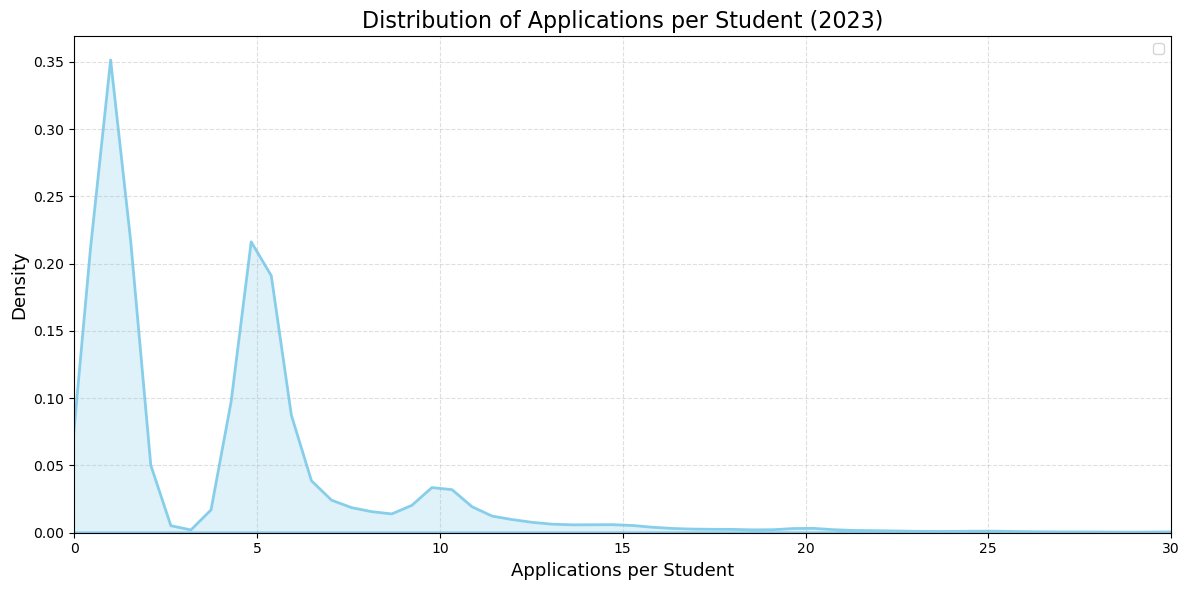

In [ ]:
#average_apps_2023 = apps_per_student['applications'].mean()

# Plot KDE for 2023
plt.figure(figsize=(12, 6))
sns.kdeplot(apps_per_student['applications'], fill=True, bw_adjust=1.2, color='skyblue', linewidth=2)
#plt.axvline(average_apps_2023, color='red', linestyle='--', linewidth=2, label=f'Average = {average_apps_2023:.2f}')
plt.xlim(0, 30)
# Titles and labels
plt.title('Distribution of Applications per Student (2023)', fontsize=16)
plt.xlabel('Applications per Student', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
df_inst = df[df['reported_institute_type'].notna()][['reported_institute', 'reported_institute_type']].drop_duplicates()
institute_type_summary = df_inst.groupby('reported_institute_type')['reported_institute'].nunique().reset_index(name='institute_count')
institute_type_summary


,reported_institute_type,institute_count
0,Govt.,73
1,Pvt.,442


In [ ]:
## check for the unique applicants for eah year how many are govt, mix and pvt in df

In [ ]:
df_filtered = df[df['Option_No'].notna()]

In [ ]:
# Keep only relevant columns

df_subset = df_filtered[['academic_year', 'aadhar_no', 'applied_institute_type']]

# Drop duplicates to get the first application per applicant per year
df_first_application = df_subset.drop_duplicates(subset=['academic_year', 'aadhar_no'])

# Group by year and type, count unique applicants
summary = (
    df_first_application.groupby(['academic_year', 'applied_institute_type'])['aadhar_no']
    .nunique()
    .unstack(fill_value=0)
    .reset_index()
    .rename_axis(None, axis=1)
)

applicant_summary = summary[['academic_year'] + sorted([col for col in summary.columns if col != 'academic_year'])]
summary['Total'] = summary[['Govt.', 'Mix', 'Pvt.']].sum(axis=1)
print(summary)
#print(applicant_summary)

   academic_year  Govt.   Mix  Pvt.  Total
0           2017  26362     0     0  26362
1           2018  20920  1688  6507  29115
2           2019  23808  5379  3790  32977
3           2020  20761  3137  1480  25378
4           2021  32258  4732  3676  40666
5           2022  30784  4177  2733  37694
6           2023  38320  5374  3896  47590
7           2024  38696  5496  2478  46670


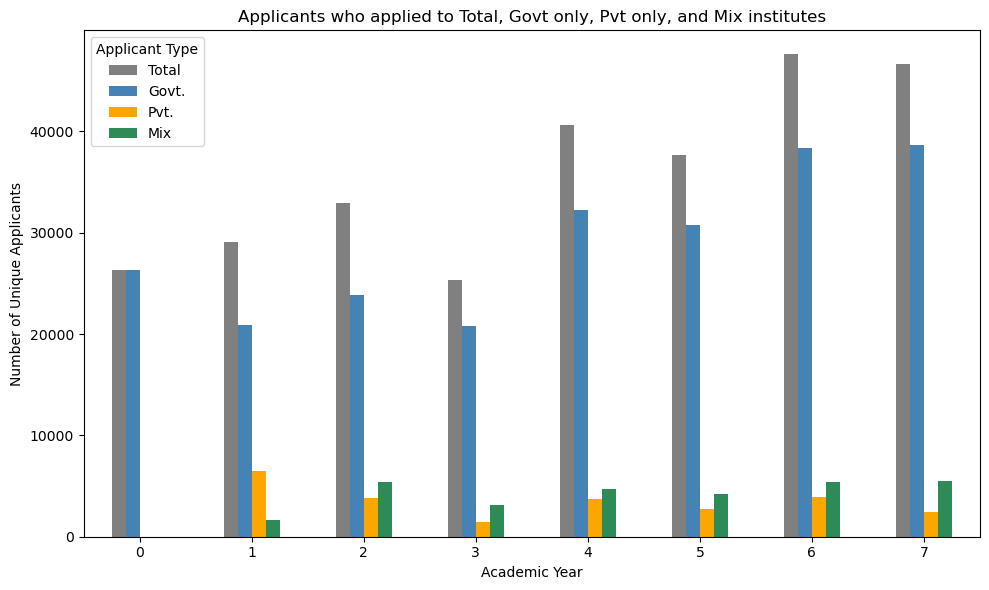

In [ ]:
import matplotlib.pyplot as plt

# Reorder and ensure correct column references
plot_data = summary[['Total','Govt.', 'Pvt.', 'Mix']].copy()
plot_data.index.name = 'academic_year'

# Plot
plot_data.plot(
    kind='bar',
    figsize=(10, 6),
    color=['gray','steelblue', 'orange', 'seagreen']
)

plt.title('Applicants who applied to Total, Govt only, Pvt only, and Mix institutes')
plt.ylabel('Number of Unique Applicants')
plt.xlabel('Academic Year')
plt.xticks(rotation=0)
plt.legend(title='Applicant Type')
plt.tight_layout()
plt.show()


In [ ]:
summary = pd.concat([
    application_summary.set_index('academic_year'),
    students_applied.set_index('academic_year'),
    avg_apps_per_year.set_index('academic_year'),
    summary.set_index('academic_year')
], axis=1).reset_index()
summary

,academic_year,application_count,unique_applicants,apps_avg_per_student,Govt.,Mix,Pvt.,Total
0,2017,145612,27337,5.326554,26362,0,0,26362
1,2018,215662,70613,3.054140,20920,1688,6507,29115
2,2019,261505,64148,4.076589,23808,5379,3790,32977
3,2020,208581,67412,3.094123,20761,3137,1480,25378
4,2021,300121,81948,3.662335,32258,4732,3676,40666
5,2022,303082,74104,4.089955,30784,4177,2733,37694
6,2023,388380,92085,4.217625,38320,5374,3896,47590
7,2024,396042,83958,4.717144,38696,5496,2478,46670


In [ ]:
# Filter rows where reported_institute is not missing
reported_df = df[df['reported_institute'].notna()]

# Count unique applicants per year
reported_summary = (
    reported_df.groupby('academic_year')['aadhar_no']
    .nunique()
    .reset_index(name='unique_reported_applicants')
)

print(reported_summary)

   academic_year  unique_reported_applicants
0           2017                       14308
1           2018                       50337
2           2019                       47791
3           2020                       44007
4           2021                       45801
5           2022                       41402
6           2023                       63688
7           2024                       60568


In [ ]:
def count_admitted_clean_applicants_by_year(df):
    """
    Counts the number of unique applicants who were finally admitted,
    only considering applicants with complete option data (no missing option fields).
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Final merged dataset with option + student info.

    Returns:
    --------
    pandas.DataFrame
        academic_year | admitted_applicants
    """
    # Define clean option-related fields
    option_fields = ['Phase', 'Option_No', 'applied_institute', 'applied_trade', 'Status', 'applied_institute_type']

    # Filter out rows with missing option data
    clean_df = df[df[option_fields].notnull().all(axis=1)]

    # Keep only admitted rows (where reported_institute is present)
    admitted_df = clean_df[clean_df['reported_institute'].notnull()]

    # Count unique applicants per academic year
    admitted_summary = (
        admitted_df[['aadhar_no', 'academic_year']]
        .drop_duplicates()
        .groupby('academic_year')
        .size()
        .reset_index(name='admitted_applicants')
        .sort_values('academic_year')
    )

    return admitted_summary

print(count_admitted_clean_applicants_by_year(df))

   academic_year  admitted_applicants
0           2017                13128
1           2018                19993
2           2019                20897
3           2020                12923
4           2021                16605
5           2022                15299
6           2023                26011
7           2024                27057


In [ ]:
# Keep only rows where student was admitted
#admitted_df = df[df['reported_institute']]

# Count admitted students per year by institute type
admitted_summary = (
    df.groupby(['academic_year', 'reported_institute_type'])['aadhar_no']
    .nunique()
    .reset_index(name='admitted_count')
    .pivot(index='academic_year', columns='reported_institute_type', values='admitted_count')
    .fillna(0)
    .astype(int)
    .reset_index()
)

admitted_summary.columns.name = None
admitted_summary

,academic_year,Govt.,Pvt.
0,2017,14308,0
1,2018,14863,35477
2,2019,15781,32010
3,2020,14265,29742
4,2021,12449,33352
5,2022,13208,28194
6,2023,21764,41924
7,2024,23420,37148


In [ ]:
#plt.figure(figsize=(10, 6))
#plt.plot(admitted_summary['academic_year'], admitted_summary.get('Govt.', 0), marker='o', label='Govt.')
#plt.plot(admitted_summary['academic_year'], admitted_summary.get('Pvt.', 0), marker='-', label='Pvt.')

# Labels and titles
#plt.title('Admitted Students by Institute Type Over the Years', fontsize=14)
#plt.xlabel('Academic Year', fontsize=12)
#plt.ylabel('Number of Admitted Students', fontsize=12)
#plt.grid(True, linestyle='--', alpha=0.5)
#plt.legend()
#plt.tight_layout()
#plt.show()

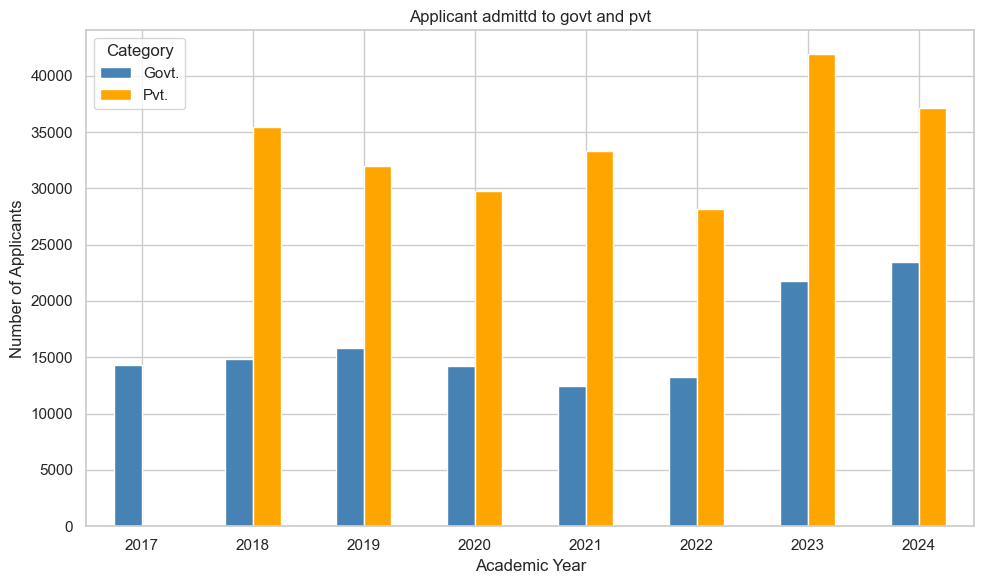

In [ ]:
plot_data = admitted_summary[['academic_year', 'Govt.', 'Pvt.']]

# Set academic_year as index for easy plotting
plot_data.set_index('academic_year')[['Govt.', 'Pvt.']].plot(
    kind='bar',
    figsize=(10, 6),
    color=['steelblue', 'orange']
)

plt.title('Applicant admittd to govt and pvt')
plt.ylabel('Number of Applicants')
plt.xlabel('Academic Year')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


In [ ]:
aadhar_ids = [
    "DPIBbWprVcPanSml/M/kQqNuvqXnpCVfeednCpqz6Ck=",
    "3oxpnfys0jZssd/c3m5m+jLhZgpkMt9DR0cHGhjMhEA="
]

# Check in option data
option_check = option_df[option_df["aadhar_no"].isin(aadhar_ids)]

# Check in reported data
reported_check = reported_df[reported_df["aadhar_no"].isin(aadhar_ids)]
reported_check

,aadhar_no,barcode,gender,dob,district,date_of_application,academic_year,module,year,course_name,...,reported_trade,reported_district,reported_institute_type,sams_code,Phase,Option_No,applied_institute,applied_trade,Status,applied_institute_type
231825,DPIBbWprVcPanSml/M/kQqNuvqXnpCVfeednCpqz6Ck=,18T0158652,Male,11-Feb-2002,Angul,05-Jun-2018,2018,ITI,2018,ITI,...,Electrician (NSQF),Angul,Govt.,011011101,1,1.0,"ITI Talcher, Anugul",Electrician (NSQF),Opted,Govt.
231826,DPIBbWprVcPanSml/M/kQqNuvqXnpCVfeednCpqz6Ck=,18T0158652,Male,11-Feb-2002,Angul,05-Jun-2018,2018,ITI,2018,ITI,...,Electrician (NSQF),Angul,Govt.,011011101,1,2.0,"ITI Talcher, Anugul",Fitter (NSQF),Opted,Govt.
231827,DPIBbWprVcPanSml/M/kQqNuvqXnpCVfeednCpqz6Ck=,18T0158652,Male,11-Feb-2002,Angul,05-Jun-2018,2018,ITI,2018,ITI,...,Electrician (NSQF),Angul,Govt.,011011101,1,3.0,"ITI Talcher, Anugul",Machinist (NSQF),Opted,Govt.
231828,DPIBbWprVcPanSml/M/kQqNuvqXnpCVfeednCpqz6Ck=,18T0158652,Male,11-Feb-2002,Angul,05-Jun-2018,2018,ITI,2018,ITI,...,Electrician (NSQF),Angul,Govt.,011011101,1,4.0,"ITI Talcher, Anugul",Mechanic (Motor Vehicle) (NSQF),Opted,Govt.
231829,DPIBbWprVcPanSml/M/kQqNuvqXnpCVfeednCpqz6Ck=,18T0158652,Male,11-Feb-2002,Angul,05-Jun-2018,2018,ITI,2018,ITI,...,Electrician (NSQF),Angul,Govt.,011011101,1,5.0,"ITI Talcher, Anugul",Turner (NSQF),Opted,Govt.
231830,DPIBbWprVcPanSml/M/kQqNuvqXnpCVfeednCpqz6Ck=,18T0158652,Male,11-Feb-2002,Angul,05-Jun-2018,2018,ITI,2018,ITI,...,Electrician (NSQF),Angul,Govt.,011011101,1,6.0,"ITI Talcher, Anugul",Mechanic Mining Machinery (NSQF),Opted,Govt.
231831,DPIBbWprVcPanSml/M/kQqNuvqXnpCVfeednCpqz6Ck=,18T0158652,Male,11-Feb-2002,Angul,05-Jun-2018,2018,ITI,2018,ITI,...,Electrician (NSQF),Angul,Govt.,011011101,1,7.0,"ITI Talcher, Anugul",Mechanic Diesel (NSQF),Opted,Govt.


In [ ]:
#df[(df['academic_year'] == 2017) & (df['applied_institute_type'] == 'Pvt.')]
#df['type_of_institute'].unique()
#govt_inst = df[df['type_of_institute'] == 'Govt.']['reported_institute'].nunique()


In [ ]:
# Filter to only Option_No == 1
df_option1 = df[df['Option_No'] == 1]

# Count unique applicants
num_applicants_option1 = df_option1['aadhar_no'].nunique()
num_applicants_option1

271610

In [ ]:
# Count how many times each student submitted Option 1
option1_counts = df_option1['aadhar_no'].value_counts()

print(option1_counts.head())  # see top students by number of Option 1 entries


aadhar_no
47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=    3057
QC4Dnr50dDstOUx2nBNt4dy5WvKwf1q4/2ZOpFFxxC4=       8
Qh0T7JLa8QmrnoKASIazwk/jsafKq/Wy58EDPxY4g/c=       7
u/3Oobn0yssTargBD0z+wQw08I5m/iE6cC2rjw2+NqA=       7
nKRxoM4K/9+CxLTs+Rdv5/BJGXU6PkZEmBdOzCY3Ahw=       7
Name: count, dtype: int64


## Understanding the data

In [ ]:
# count unique applicants for each year which has option_no as NAN
# group by year and count unique aadhar_no
nan_option_count = (
    df[df['Option_No'].isna()]
    .groupby('year')['aadhar_no']
    .nunique()
    .reset_index(name='nan_option_count')
)
print(nan_option_count.to_string(index=False))

 year  nan_option_count
 2017              2257
 2018             43790
 2019             31171
 2020             42034
 2021             41282
 2022             36410
 2023             44495
 2024             37288


In [ ]:
# Aadhaar number to exclude
excluded_aadhar = '47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU='

# Filter for 2017, Option_No == 1, and exclude the given Aadhaar
df_2017_option1 = df[
    (df['year'] == 2017) &
    (df['Option_No'] == 1) &
    (df['aadhar_no'] != excluded_aadhar)
]

# Count how many times each aadhar_no selected Option_No = 1
option1_counts = df_2017_option1['aadhar_no'].value_counts()

# SIdentify Aadhaar numbers with more than one Option_No = 1 entry
duplicate_aadhars = option1_counts[option1_counts > 1].index

# Count total unique aadhar_no with duplicate Option 1 entries
total_duplicate_aadhar = len(duplicate_aadhars)
print(f"Total unique Aadhaar numbers with Option_No=1 more than once in 2017 (excluding specified): {total_duplicate_aadhar}")

# Display sample records (for 3 Aadhaar numbers)
sample_aadhars = list(duplicate_aadhars[:3])
sample_df = df_2017_option1[df_2017_option1['aadhar_no'].isin(sample_aadhars)]

# Show relevant columns
sample_output = sample_df[['aadhar_no', 'barcode', 'Institute', 'Trade', 'Option_No', 'Phase', 'year']]
print(sample_output.to_string(index=False))

Total unique Aadhaar numbers with Option_No=1 more than once in 2017 (excluding specified): 3309
                                   aadhar_no     barcode                Institute                                              Trade  Option_No Phase  year
CBMVzByrsFjND5OdUa2uXomlmx7Zchb5/EuyDdvclpY=  17T0170448  ITI Phulbani, Kandhamal Computer Operator and Programming Assistant (NSQF)        1.0     1  2017
CBMVzByrsFjND5OdUa2uXomlmx7Zchb5/EuyDdvclpY=  17T0166938  ITI Phulbani, Kandhamal                                 Electrician (NSQF)        1.0     1  2017
hcoLKiPxliwBxs/ZR9Wb7qTb8zgSH3M0HknoWj2aGGI=  17T0368417 TTI Takatpur, Mayurbhanj                                      Fitter (NSQF)        1.0     1  2017
hcoLKiPxliwBxs/ZR9Wb7qTb8zgSH3M0HknoWj2aGGI=  17T0299158 TTI Takatpur, Mayurbhanj                                 Electrician (NSQF)        1.0     1  2017
kzpk+HXAb7ibCmSH7dowIKgxeE3MKHVz//L/8pp+XA8=  17T0147586    ITI Berhampur, Ganjam                             Mechanic Dies

# Ranking trades by the applicants

In [ ]:
df.columns

Index(['aadhar_no', 'barcode', 'gender', 'dob', 'date_of_application',
       'academic_year', 'module', 'year', 'course_name', 'course_period',
       'reported_institute', 'reported_trade', 'reported_district',
       'type_of_institute', 'sams_code', 'Phase', 'Option_No', 'Institute',
       'Trade', 'Status'],
      dtype='object')

In [ ]:
# ranking of trades by the gender of the applicant
#ranked_trade = df_option2.groupby(['Trade','year','gender'])['aadhar_no'].nunique().reset_index()

#separate table
#ranked_trade_male = ranked_trade[ranked_trade['gender'] == 'Male'].pivot(index='Trade', columns='year', values='aadhar_no').fillna(0).astype(int)
#ranked_trade_female = ranked_trade[ranked_trade['gender'] == 'Female'].pivot(index='Trade', columns='year', values='aadhar_no').fillna(0).astype(int)

# do the sm for total applicants
# in the end reorder and sort

In [ ]:
# rank trades by unique applicants
df_option1 = df[df['Option_No'] == 1]
df_option1 = df_option1.sort_values(by = 'barcode')
df_option1 = df_option1.drop_duplicates(subset= ['aadhar_no','year'])
df_option2 = df_option1.dropna(subset = ['Institute','Trade', 'year'])

ranked_trade = (
    df_option2
    .groupby(['Trade', 'year'])['aadhar_no']
    .nunique()
    .reset_index()
)
ranked_trade = ranked_trade.pivot(index='Trade', columns='year', values='aadhar_no').fillna(0).astype(int)
ranked_trade['Applicants'] = ranked_trade.sum(axis=1)
cols = ['Applicants'] + [col for col in ranked_trade.columns if col != 'Applicants']
ranked_trade = ranked_trade[cols].reset_index().sort_values(by='Applicants', ascending=False)
print(ranked_trade.to_string(index=False))


                                                         Trade  Applicants  2017  2018  2019  2020  2021  2022  2023  2024
                                            Electrician (NSQF)      131509 10351 12673 14690 10735 18532 18134 23179 23215
                                                 Fitter (NSQF)       76524  7706 10187 10686  6861 11737  8893 10646  9808
                               Mechanic (Motor Vehicle) (NSQF)       12399   908   673  1178  1223  2010  1788  2133  2486
                                   Electronics Mechanic (NSQF)       10503  1459   952  1052  1135  1507  1114  1838  1446
            Computer Operator and Programming Assistant (NSQF)       10184   499   489   674   633   997  1722  2579  2591
                                                 Welder (NSQF)        8256  1109   820   812  1194  1166  1079  1096   980
                                              Machinist (NSQF)        4095   492   486   594   484   533   474   497   535
                

In [ ]:
import os

# Define folder and filename
output_folder = r"C:\Users\Admin\Desktop\Trades_Analysis"
output_filename = "ranked_trade.xlsx"
output_path = os.path.join(output_folder, output_filename)

# Ensure folder exists
os.makedirs(output_folder, exist_ok=True)

# Save DataFrame to Excel
ranked_trade.to_excel(output_path, index=False)

print(f"File saved to: {output_path}")


File saved to: C:\Users\Admin\Desktop\Trades_Analysis\ranked_trade.xlsx


## ranking trade graph

In [ ]:
# Select top N trades
top_n = 10
top_trades = ranked_trade.head(top_n).set_index('Trade')

# Identify year columns
year_columns = [col for col in top_trades.columns if isinstance(col, int)]
years = sorted(year_columns)

# Create the figure
fig = go.Figure()

# Add a line for each trade
for trade in top_trades.index:
    fig.add_trace(go.Scatter(
        x=years,
        y=top_trades.loc[trade, years],
        mode='lines+markers',
        name=trade
    ))

# Customize layout
fig.update_layout(
    title="Trade-Wise Applicant Trends Over Years",
    xaxis_title="Year",
    yaxis_title="Number of Applicants",
    legend_title="Trade",
    height=600,
    hovermode="x unified"
)

#  Show the plot
fig.show()


#### ranking by module

In [ ]:
def rank_trade_by_module(df, module):
    """
    Ranks trades within a module by the number of unique applicants for Option_No = 1

    Parameters:
    df : PandaDataframe, application dataset
    module : str
        The name of the module (e.g., ITI or Diploma) to filter and rank1

    Returns:
    pandas.DataFrame
        A dataframe containing trades ranked by total unique applicants, with columns by year and total.
    """
    df_module = (
        df[(df['module'] == module) & (df['Option_No'] == 1)]
        .sort_values(by='barcode')
        .drop_duplicates(subset=['aadhar_no', 'year'])
        .dropna(subset=['Trade', 'year'])
    )
    ranked_trade = (
        df_module
        .groupby(['Trade', 'year'])['aadhar_no']
        .nunique()
        .reset_index()
    )
    ranked_trade = ranked_trade.pivot(index='Trade', columns='year', values='aadhar_no').fillna(0).astype(int)
    ranked_trade['Applicants'] = ranked_trade.sum(axis=1)
    cols = ['Applicants'] + [col for col in ranked_trade.columns if col != 'Applicants']
    ranked_trade = ranked_trade[cols].reset_index().sort_values(by='Applicants', ascending=False)
    return ranked_trade

# Set path to your target folder for trade rankings
filepath_trade = r'C:\Users\Admin\Documents\ranked_trades.xlsx'

# Write each module's trade rankings to a separate sheet
with pd.ExcelWriter(filepath_trade) as writer:
    for module in modules:
        ranked_trade_df = rank_trade_by_module(df, module)
        sheet_name = f'Ranked_{module}_Trades'
        ranked_trade_df.to_excel(writer, sheet_name=sheet_name[:31], index=False)  # Excel sheet names must be <=31 chars

print(f"Ranked trades by module saved to {filepath_trade}")

Ranked trades by module saved to C:\Users\Admin\Documents\ranked_trades.xlsx


In [ ]:
# save both rankins to one excel file
with pd.ExcelWriter(r"C:\Users\Admin\Documents\applicant_ranking_report.xlsx", engine='openpyxl') as writer:
    ranked_trade.to_excel(writer, sheet_name='Institute_Ranking', index=False)
    ranked_trade.to_excel(writer, sheet_name='Trade_Ranking', index=False)

# Seats available by trades

In [ ]:
iti_enrollment.head()

,sams_code,Trade,branch,module,academic_year,category,strength,reported_institute,reported_district,type_of_institute
0,050211102,Computer Hardware & Network Maintenance (NSQF),None,ITI,2017,Total,52,"Gandhamardana ITI, Bolangir",Bolangir,Govt.
1,050211102,Dress Making (NSQF),None,ITI,2017,Total,42,"Gandhamardana ITI, Bolangir",Bolangir,Govt.
2,050211102,Electrician (NSQF),None,ITI,2017,Total,21,"Gandhamardana ITI, Bolangir",Bolangir,Govt.
3,050211102,Electronics Mechanic (NSQF),None,ITI,2017,Total,52,"Gandhamardana ITI, Bolangir",Bolangir,Govt.
4,050211102,Fitter (NSQF),None,ITI,2017,Total,78,"Gandhamardana ITI, Bolangir",Bolangir,Govt.


In [ ]:
# calculate total strenggth of each trade by year for ITI module
#sort values of strength by year and trade
# Clean and standardize columns


# Group by trade and academic year, summing strength
seats_by_trades = (
    iti_enrollment
    .groupby(['Trade', 'academic_year'])['strength']
    .sum()
    .reset_index()
)

# Pivot table to reshape format
seats_by_trades = seats_by_trades.pivot(index='Trade', columns='academic_year', values='strength').fillna(0).astype(int)

# add one more column with total seats
seats_by_trades['Total Seats'] = seats_by_trades.sum(axis=1)

# Reorder columns to show 'Total Seats' at the first position
seats_by_trades = seats_by_trades[['Total Seats'] + [col for col in seats_by_trades.columns if col != 'Total Seats']]
# rename trade column to 'Trade'
seats_by_trades = seats_by_trades.rename_axis('Trade').reset_index().sort_values(by='Total Seats', ascending=False)
print(seats_by_trades.to_string(index=False))

                                                         Trade  Total Seats  2017  2019  2020  2021  2022  2023  2024
                                                 Fitter (NSQF)       215947  4007 42856 39812 38976 29316 31292 29688
                                            Electrician (NSQF)       182312  4126 35144 32768 31060 25820 27168 26226
                                                 Welder (NSQF)        24630  1750  3756  3896  3736  3856  3796  3840
            Computer Operator and Programming Assistant (NSQF)        18994   402  2936  2888  2720  3224  3296  3528
                                   Electronics Mechanic (NSQF)        13940  1164  2664  2416  2472  1696  1920  1608
                                      Sewing Technology (NSQF)        10784   204  1596  1596  1596  1876  1916  2000
                               Mechanic (Motor Vehicle) (NSQF)        10396   692  1752  1496  1700  1404  1720  1632
                                                Plumber 

In [ ]:
import os

# Define folder and filename
output_folder = r"C:\Users\Admin\Desktop\Trades_Analysis"
output_filename = "seats_by_trades.xlsx"
output_path = os.path.join(output_folder, output_filename)

# Ensure folder exists
os.makedirs(output_folder, exist_ok=True)

# Save DataFrame to Excel
seats_by_trades.to_excel(output_path, index=False)

print(f"File saved to: {output_path}")

File saved to: C:\Users\Admin\Desktop\Trades_Analysis\seats_by_trades.xlsx


In [ ]:
seats_by_trades.head()

academic_year,Trade,Total Seats,2017,2019,2020,2021,2022,2023,2024
26,Fitter (NSQF),215947,4007,42856,39812,38976,29316,31292,29688
22,Electrician (NSQF),182312,4126,35144,32768,31060,25820,27168,26226
92,Welder (NSQF),24630,1750,3756,3896,3736,3856,3796,3840
13,Computer Operator and Programming Assistant (N...,18994,402,2936,2888,2720,3224,3296,3528
24,Electronics Mechanic (NSQF),13940,1164,2664,2416,2472,1696,1920,1608


In [ ]:
ranked_trade.head()

year,Trade,Applicants,2017,2018,2019,2020,2021,2022,2023,2024
20,Electrician (NSQF),131509,10351,12673,14690,10735,18532,18134,23179,23215
24,Fitter (NSQF),76524,7706,10187,10686,6861,11737,8893,10646,9808
51,Mechanic (Motor Vehicle) (NSQF),12399,908,673,1178,1223,2010,1788,2133,2486
22,Electronics Mechanic (NSQF),10503,1459,952,1052,1135,1507,1114,1838,1446
12,Computer Operator and Programming Assistant (N...,10184,499,489,674,633,997,1722,2579,2591


In [ ]:
seats_available_trade = pd.merge(seats_by_trades, ranked_trade[['Trade', 'Applicants']], on='Trade', how='inner')
seats_available_trade['available_seats'] = seats_available_trade['Total Seats'] - seats_available_trade['Applicants']
seats_available_trade = seats_available_trade[['Trade', 'Total Seats', 'Applicants', 'available_seats']]
seats_available_trade = seats_available_trade.sort_values(by='Applicants', ascending=False)
seats_available_trade.columns = ['Trade', 'Total Seats', 'Total Applicants', 'Available Seats']
print(seats_available_trade.to_string(index=False))

                                                         Trade  Total Seats  Total Applicants  Available Seats
                                            Electrician (NSQF)       182312            131509            50803
                                                 Fitter (NSQF)       215947             76524           139423
                               Mechanic (Motor Vehicle) (NSQF)        10396             12399            -2003
                                   Electronics Mechanic (NSQF)        13940             10503             3437
            Computer Operator and Programming Assistant (NSQF)        18994             10184             8810
                                                 Welder (NSQF)        24630              8256            16374
                                              Machinist (NSQF)         4424              4095              329
                                      Sewing Technology (NSQF)        10784              3306             7478
 

In [ ]:
import os

# Define folder and filename
output_folder = r"C:\Users\Admin\Desktop\Trades_Analysis"
output_filename = "seats_available_trade.xlsx"
output_path = os.path.join(output_folder, output_filename)

# Ensure folder exists
os.makedirs(output_folder, exist_ok=True)

# Save DataFrame to Excel
seats_available_trade.to_excel(output_path, index=False)

print(f"File saved to: {output_path}")


File saved to: C:\Users\Admin\Desktop\Trades_Analysis\seats_available_trade.xlsx


#### seats available by module

In [ ]:
# seat available by trades for both ITI and Diploma
# save to excel file

def trade_seat_vs_demand(df, iti_enrollment, module = 'ITI'):
    ranked_trades = rank_trade_by_module(df, module)
    seats = (
        iti_enrollment[iti_enrollment['module'] == module]
        .copy()
        .dropna(subset=['trade', 'academic_year', 'strength'])
    )
    seats['trade'] = seats['trade'].str.strip().str.title()
    seats['academic_year'] = seats['academic_year'].astype(int)

    seats_by_trades = (
        seats
        .groupby(['trade', 'academic_year'])['strength']
        .sum()
        .reset_index()
        .pivot(index='trade', columns='academic_year', values='strength')
        .fillna(0)
        .astype(int)
    )     
    seats_by_trades['Total Seats'] = seats_by_trades.sum(axis=1)
    seats_by_trades = seats_by_trades[['Total Seats'] + [col for col in seats_by_trades.columns if col != 'Total Seats']]
    seats_by_trades = seats_by_trades.rename_axis('Trade').reset_index().sort_values(by='Total Seats', ascending=False)

    ranked_trades['Trade'] = ranked_trades['Trade'].str.strip().str.title()

    trade_analysis = pd.merge(seats_by_trades, ranked_trades[['Trade', 'Applicants']], on='Trade', how='inner')
    trade_analysis['Available Seats'] = trade_analysis['Total Seats'] - trade_analysis['Applicants']    
    trade_analysis = trade_analysis[['Trade', 'Total Seats', 'Applicants', 'Available Seats']]
    trade_analysis.columns = ['Trade', 'Total Seats', 'Total Applicants', 'Available Seats']
    trade_analysis = trade_analysis.sort_values(by='Total Applicants', ascending=False)
    return trade_analysis

In [ ]:
# Set path to save the analysis file
filepath_trade_analysis = r'C:\Users\Admin\Documents\iti_trade_seat_vs_applicants.xlsx'

# Write each module's trade-seat-applicant analysis to a separate sheet
with pd.ExcelWriter(filepath_trade_analysis) as writer:
    for module in df['module'].dropna().unique():
        trade_seat_df = trade_seat_vs_demand(df, iti_enrollment, module)
        sheet_name = f'{module}_Trade_Analysis'
        trade_seat_df.to_excel(writer, sheet_name=sheet_name[:31], index=False)

print(f"Trade seat vs applicant analysis saved to {filepath_trade_analysis}")


# Suppy Demand plot for the trade

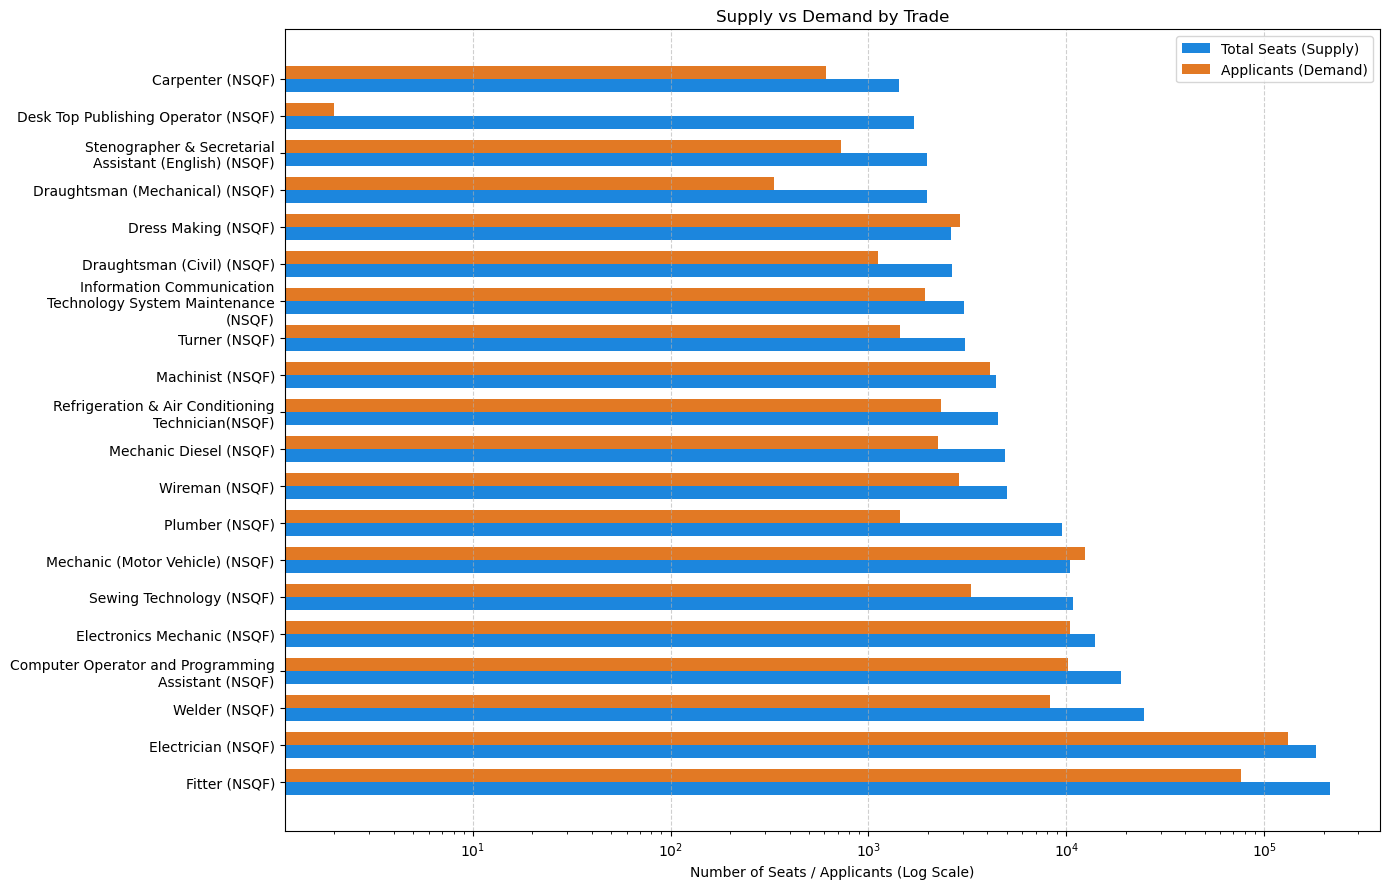

In [ ]:
import matplotlib.pyplot as plt
import textwrap

def wrap_labels(labels, width=35):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

df_plot = seats_available_trade.sort_values(by='Total Seats', ascending=False).head(20)
df_plot['Trade_wrapped'] = wrap_labels(df_plot['Trade'])

plt.figure(figsize=(14, 9))
bar_width = 0.35
indices = range(len(df_plot))

# Muted colors
color_supply = "#1C86DD"  # Muted blue
color_demand = "#E27924"  # Muted orange

# Bars
plt.barh(indices, df_plot['Total Seats'], height=bar_width, label='Total Seats (Supply)', color=color_supply)
plt.barh([i + bar_width for i in indices], df_plot['Total Applicants'], height=bar_width, label='Applicants (Demand)', color=color_demand)

# Log scale for better small/large comparison
plt.xscale('log')
plt.xlabel('Number of Seats / Applicants (Log Scale)')
plt.title('Supply vs Demand by Trade')
plt.yticks([i + bar_width / 2 for i in indices], df_plot['Trade_wrapped'])
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Top 10 Trades with Surplus Seats'}, ylabel='Trade'>

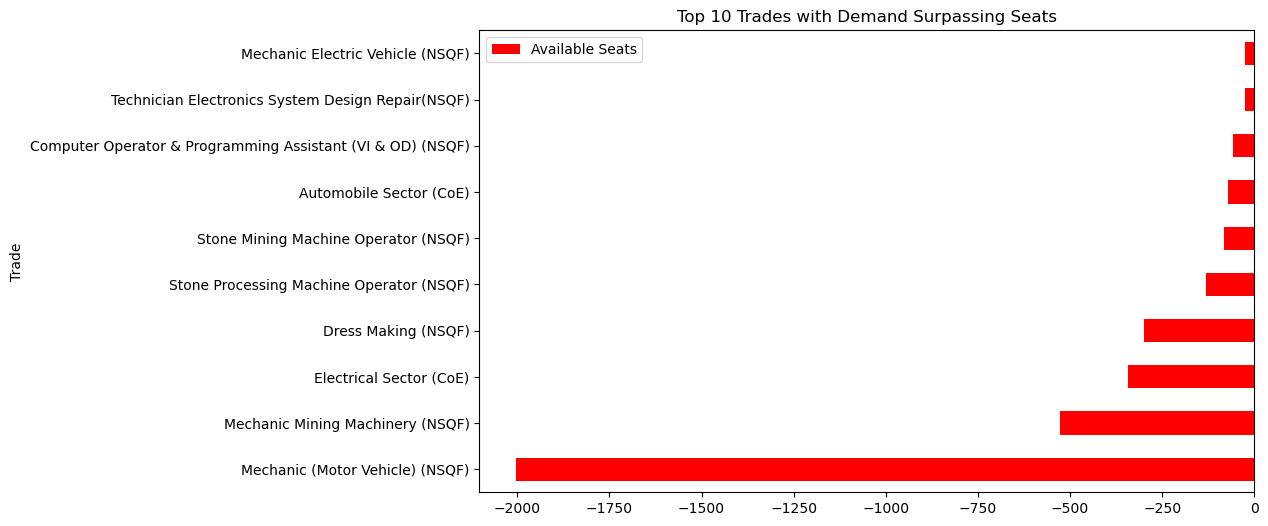

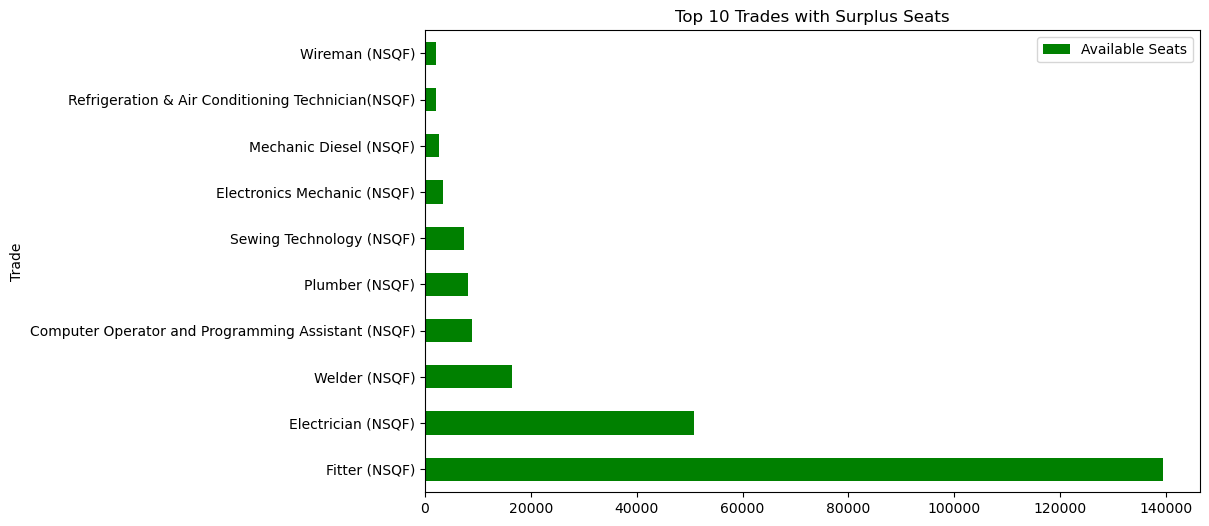

In [ ]:
# Top 10 trades where demand > supply
overloaded = seats_available_trade[seats_available_trade['Available Seats'] < 0]
top_overloaded = overloaded.sort_values(by='Available Seats').head(10)

top_overloaded.plot.barh(
    x='Trade', y='Available Seats', color='red', figsize=(10, 6), title='Top 10 Trades with Demand Surpassing Seats'
)

# Where seats >> demand
underutilized = seats_available_trade[seats_available_trade['Available Seats'] > 0]
top_underutilized = underutilized.sort_values(by='Available Seats', ascending=False).head(10)

top_underutilized.plot.barh(
    x='Trade', y='Available Seats', color='green', figsize=(10, 6), title='Top 10 Trades with Surplus Seats'
)



In [ ]:
import plotly.express as px
import pandas as pd

# Classify utilization categories
seats_available_trade['Utilization Ratio'] = seats_available_trade['Total Applicants'] / seats_available_trade['Total Seats']

def classify_utilization(ratio):
    if ratio > 1.1:
        return 'Overutilized'
    elif ratio < 0.9:
        return 'Underutilized'
    else:
        return 'Balanced'

seats_available_trade['Utilization Category'] = seats_available_trade['Utilization Ratio'].apply(classify_utilization)


# Prepare detailed info per category
def format_trade_list(df):
    return "<br>".join([f"{row['Trade']}: {int(row['Available Seats'])}" for _, row in df.iterrows()])

grouped = (
    seats_available_trade
    .groupby('Utilization Category')
    .apply(format_trade_list)
    .reset_index(name='Details')
)

# Count how many trades in each category (for pie values)
category_counts = seats_available_trade['Utilization Category'].value_counts().reset_index()
category_counts.columns = ['Utilization Category', 'Count']

# Merge for hover details
merged = category_counts.merge(grouped, on='Utilization Category')

# Plot pie chart
fig = px.pie(
    merged,
    names='Utilization Category',
    values='Count',
    title='Seat Utilization by Trade Category',
    hole=0.4
)

# Custom hover text showing trade: available seat
fig.update_traces(
    hovertemplate="<b>%{label}</b><br>%{customdata[0]}",
    customdata=merged[['Details']]
)

fig.update_layout(
    showlegend=True,
    height=600,
    width=700
)

fig.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_29664\57944391.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(format_trade_list)


# Ranking Institutes by the applicants

In [ ]:
df.columns

Index(['aadhar_no', 'barcode', 'gender', 'dob', 'date_of_application',
       'academic_year', 'module', 'year', 'course_name', 'course_period',
       'reported_institute', 'reported_trade', 'reported_district',
       'type_of_institute', 'sams_code', 'Phase', 'Option_No', 'Institute',
       'Trade', 'Status'],
      dtype='object')

In [ ]:
#df_option1 = df[df['Option_No'] == 1]
#df_option1 = df_option1.sort_values(by = 'barcode')
#df_option1 = df_option1.drop_duplicates(subset= ['aadhar_no','year'])

In [ ]:
# govt vs private
# district wise
# top 25%, middle 25% and bottom 25%
# Identifying institutes witg rising and falling an dstable intersts
# filter by thresholds

In [ ]:
ranked_institute = (
    df_option1
    .groupby(['Institute', 'year'])['aadhar_no']
    .nunique()
    .reset_index()
)

ranked_institute = ranked_institute.pivot(index='Institute', columns='year', values='aadhar_no').fillna(0).astype(int)
ranked_institute['Applicants'] = ranked_institute.sum(axis=1)
cols = ['Applicants'] + [col for col in ranked_institute.columns if col != 'Applicants']
ranked_institute = ranked_institute[cols].reset_index().sort_values(by='Applicants', ascending=False)
print(ranked_institute.to_string(index=False))

                                                            Institute  Applicants  2017  2018  2019  2020  2021  2022  2023  2024
                                                ITI Berhampur, Ganjam       27438  2782  2859  2600  3670  4265  3428  3958  3876
                                                          ITI Cuttack       18168  2226  1738  2300  1772  2661  2271  2788  2412
                                                         ITI Balasore       15778  1597  1671  2295  1448  2355  2153  2130  2129
                                            ITI Rourkela, Sunderagarh       15530  1987  1644  2244  1489  2049  1816  2050  2251
                                               ITI Hirakud, Sambalpur       11261  1212   972  1499   772  1450  1475  1792  2089
                                             TTI Takatpur, Mayurbhanj        9627  1285   860  1307   896  1238  1249  1387  1405
                                                 ITI Barbil, Keonjhar        8904   879   

In [ ]:

# Define folder and filename
output_folder = r"C:\Users\Admin\Desktop\Institute_Analysis"
output_filename = "ranked_institute.xlsx"
output_path = os.path.join(output_folder, output_filename)

# Ensure folder exists
os.makedirs(output_folder, exist_ok=True)

# Save DataFrame to Excel
ranked_institute.to_excel(output_path, index=False)

print(f"File saved to: {output_path}")


File saved to: C:\Users\Admin\Desktop\Institute_Analysis\ranked_institute.xlsx


In [ ]:
# Select top N institutes
top_n = 10
top_institutes = ranked_institute.head(top_n).set_index('Institute')

# Identify year columns
year_columns = [col for col in top_institutes.columns if isinstance(col, int)]
years = sorted(year_columns)

# Create the figure
fig = go.Figure()

# Add a line for each institute
for institute in top_institutes.index:
    fig.add_trace(go.Scatter(
        x=years,
        y=top_institutes.loc[institute, years],
        mode='lines+markers',
        name=institute
    ))

# Customize layout
fig.update_layout(
    title="Institute-Wise Applicant Trends Over Years",
    xaxis_title="Year",
    yaxis_title="Number of Applicants",
    legend_title="Institute",
    height=600,
    hovermode="x unified"
)

#Show the plot
fig.show()


In [ ]:
import pandas as pd
import re

# Keywords that are in the dataset that contains in the private or non-govt institute name
private_keywords = ['ITC', 'I.T.C', 'Pvt.', 'Private', 'Tech', 'Training Centre']

# Build regex pattern to exclude based on keywords
pattern = '|'.join([re.escape(word) for word in private_keywords])

filtered_govt = df[
    (df['type_of_institute'] == 'Govt.') &
    (~df['Institute'].str.contains(pattern, case=False, na=False))
]['Institute'].dropna().unique()

# Explicitly remove known private/non-govt names
blacklist = [
    'Vinayak Institute of Industrial Training',
    'Black Diomond ITI',
    'Indira Memorial ITI',
    'FAKIR MOHAN ITI P.',
    'Balajee Institute of Vocational Training',
    'Swami Sivananda',
    'Bishal ITIC',
    'St. Marry',
    'Saraswat ITI',
    'Balaji Pvt ITI KHARIAR (Proposed for De-affiliation)',
    'Radhakrishna Pvt ITI',
    'Centurion University',
    'Centurian University, Ramachndrapur, Jtani'
]

# Remove blacklisted names from the filtered list
cleaned_govt_list = [inst for inst in filtered_govt if inst not in blacklist]

# Create DataFrame for cleaned list
govt_institutes_df = pd.DataFrame({'Govt Institutes': cleaned_govt_list})

# Print count and display DataFrame
print(f"Total filtered Govt ITIs: {len(govt_institutes_df)}")
print(govt_institutes_df.to_string(index=False))


Total filtered Govt ITIs: 72
                       Govt Institutes
                   ITI Talcher, Anugul
              TTI Takatpur, Mayurbhanj
             ITI Rourkela, Sunderagarh
                           ITI Cuttack
                  ITI Barbil, Keonjhar
Purna Chandra ITI Baripada, Mayurbhanj
                            ITI Jajpur
          SIPT Pattamundai, Kendrapada
                              ITI Puri
                          ITI Balasore
                ITI Hirakud, Sambalpur
                         ITI Dhenkanal
                        ITI Jharsuguda
               ITI Rasanpur, Sambalpur
               Madhusudan ITI, Cuttack
                           ITI Bargarh
                   ITI Bheden, Bargarh
                  ITI Barkote, Deogarh
               ITI Bhubaneswar, Khurda
                 ITI Laxmipur, Koraput
                           ITI Sonepur
                          ITI Bolangir
           ITI Bhawanipatna, Kalahandi
    Special ITI for PWD, Jatni, Khu

In [ ]:
# Filter institute names by type from df_option1
govt_institutes = df[df['type_of_institute'] == 'Govt.']['Institute'].unique()
pvt_institutes = df[df['type_of_institute'] == 'Pvt.']['Institute'].unique()

# Filter ranked_institute using these names
govt_institutes_df = ranked_institute[ranked_institute['Institute'].isin(govt_institutes)]
private_institutes_df = ranked_institute[ranked_institute['Institute'].isin(pvt_institutes)]


In [ ]:
# Print summaries
print(f"\nTotal Govt Institutes: {len(govt_institutes_df)}")
print("--- Top 10 Govt Institutes by Applicants ---")
print(govt_institutes_df.head(10).to_string(index=False))

print(f"\nTotal Private Institutes: {len(private_institutes_df)}")
print("--- Top 10 Private Institutes by Applicants ---")
print(private_institutes_df.head(10).to_string(index=False))


Total Govt Institutes: 464
--- Top 10 Govt Institutes by Applicants ---
                      Institute  Applicants  2017  2018  2019  2020  2021  2022  2023  2024
          ITI Berhampur, Ganjam       27438  2782  2859  2600  3670  4265  3428  3958  3876
                    ITI Cuttack       18168  2226  1738  2300  1772  2661  2271  2788  2412
                   ITI Balasore       15778  1597  1671  2295  1448  2355  2153  2130  2129
      ITI Rourkela, Sunderagarh       15530  1987  1644  2244  1489  2049  1816  2050  2251
         ITI Hirakud, Sambalpur       11261  1212   972  1499   772  1450  1475  1792  2089
       TTI Takatpur, Mayurbhanj        9627  1285   860  1307   896  1238  1249  1387  1405
           ITI Barbil, Keonjhar        8904   879   665   836   611  1446  1300  1632  1535
        ITI Bhubaneswar, Khurda        8498   689   642   855   908  1435   959  1574  1436
            ITI Talcher, Anugul        8402   957   889   989   901  1251   912  1486  1017
Gopaban

In [ ]:
total_admissions = [14308, 50337, 47791, 44007, 45801, 41402, 63688, 60568]
years = list(range(2017, 2024))

In [ ]:
# Extract year columns
year_cols = [col for col in govt_institutes_df.columns if isinstance(col, int)]

# Sum applicants by year
govt_totals = govt_institutes_df[year_cols].sum()
private_totals = private_institutes_df[year_cols].sum()

# Create combined dataframe
summary_df = pd.DataFrame({
    'Year': year_cols,
    'Govt ITIs': govt_totals.values,
    'Private ITIs': private_totals.values,
    'Total Applicants': govt_totals.values + private_totals.values,
    'Total Admitted': total_admissions
})

In [ ]:
summary_df.head(10)

,Year,Govt ITIs,Private ITIs,Total Applicants,Total Admitted
0,2017,26362,26362,52724,14308
1,2018,23534,29043,52577,50337
2,2019,28156,32955,61111,47791
3,2020,23663,25364,49027,44007
4,2021,36287,40558,76845,45801
5,2022,34999,37686,72685,41402
6,2023,43188,47586,90774,63688
7,2024,43688,46616,90304,60568


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Govt ITIs
fig.add_trace(go.Scatter(
    x=summary_df['Year'], y=summary_df['Govt ITIs'],
    mode='lines+markers',
    name='Govt ITIs Applicants',
    line=dict(dash='dash', width=3),
    marker=dict(symbol='circle', size=7)
))

# Private ITIs
fig.add_trace(go.Scatter(
    x=summary_df['Year'], y=summary_df['Private ITIs'],
    mode='lines+markers',
    name='Private ITIs Applicants',
    line=dict(dash='dot', width=3),
    marker=dict(symbol='circle', size=7)
))

# Total Admitted
fig.add_trace(go.Scatter(
    x=summary_df['Year'], y=summary_df['Total Admitted'],
    mode='lines+markers',
    name='Total Admitted',
    line=dict(dash='solid', width=3),
    marker=dict(symbol='circle', size=7)
))

fig.update_layout(
    title='Govt & Private ITI Applicants vs Total Admitted Students',
    xaxis_title='Year',
    yaxis_title='Number of Students',
    xaxis=dict(dtick=1, tickmode='linear'),  # Ensure all years are shown
    yaxis=dict(tickformat=','),
    template='plotly_white',
    width=950,
    height=500
)

fig.show()


#### shows what % of the total pool came from each type.

In [ ]:
import plotly.graph_objects as go

# Compute share columns
summary_df['Govt Applicants per Seat (%)'] = (summary_df['Govt ITIs'] / summary_df['Total Admitted']) * 100
summary_df['Pvt. Applicants per Seat (%)'] = (summary_df['Private ITIs'] / summary_df['Total Admitted']) * 100

# Create figure
fig2 = go.Figure()

# Govt ITI line (blue) — text well below the point
fig2.add_trace(go.Scatter(
    x=summary_df['Year'],
    y=summary_df['Govt Applicants per Seat (%)'],
    mode='lines+markers+text',
    name='Govt Applicants per Seat (%)',
    line=dict(dash='solid', width=3),
    text=[f"{val:.1f}%" for val in summary_df['Govt Applicants per Seat (%)']],
    textposition="bottom right",  # Slightly below and right of marker
    textfont=dict(size=11, color='black'),
    marker=dict(symbol='circle', size=7)
))

# Pvt ITI line (red) — text well above the point
fig2.add_trace(go.Scatter(
    x=summary_df['Year'],
    y=summary_df['Pvt. Applicants per Seat (%)'],
    mode='lines+markers+text',
    name='Pvt. Applicants per Seat (%)',
    line=dict(dash='dash', width=3),
    text=[f"{val:.1f}%" for val in summary_df['Pvt. Applicants per Seat (%)']],
    textposition="top left",  # Slightly above and left of marker
    textfont=dict(size=11, color='black'),
    marker=dict(symbol='circle', size=7)
))

# Final layout
fig2.update_layout(
    title='Govt vs Private ITI Share of Total Admissions',
    xaxis_title='Year',
    yaxis_title='Percentage (%)',
    xaxis=dict(dtick=1, tickmode='linear'),
    yaxis=dict(range=[0, 110]),  # Allow headroom for label spacing
    template='plotly_white',
    width=950,
    height=500
)

fig2.show()


Govt Share (%) = (Govt ITI Applicants / Total Admitted) * 100

In [ ]:
summary_df.head(10)

,Year,Govt ITIs,Private ITIs,Total Applicants,Total Admitted,Govt Applicants per Seat (%),Pvt. Applicants per Seat (%)
0,2017,26362,26362,52724,14308,184.246575,184.246575
1,2018,23534,29043,52577,50337,46.752886,57.697121
2,2019,28156,32955,61111,47791,58.914858,68.956498
3,2020,23663,25364,49027,44007,53.770991,57.636285
4,2021,36287,40558,76845,45801,79.227528,88.552652
5,2022,34999,37686,72685,41402,84.534564,91.024588
6,2023,43188,47586,90774,63688,67.811833,74.717372
7,2024,43688,46616,90304,60568,72.130498,76.964734


In [ ]:
# ranking institutes for both module ITI and Diploma
# take both the mndule from module_name = df['module']
# storing output of both ITI and Diploma in one excel file as two separate sheet


def rank_institutes_by_module(df, module):
    """
    Ranks institutes by the number of unique applicants for a given module.

    Parameters:
    df : pandas.DataFrame
        The applicant dataset.
    module : str
        The module name to filter by (e.g., 'ITI', 'Diploma').

    Returns:
    pandas.DataFrame
        A dataframe with institutes ranked by total unique applicants across years.
    """
    df_module = (
        df[(df['module'] == module) & (df['Option_No'] == 1)]
        .sort_values(by='barcode')
        .drop_duplicates(subset=['aadhar_no', 'year'])
        .dropna(subset=['Institute_Name', 'year'])
    )
    ranked_institute = (
        df_module
        .groupby(['Institute_Name', 'year'])['aadhar_no']
        .nunique()
        .reset_index()
    )
    ranked_institute = ranked_institute.pivot(index='Institute_Name', columns='year', values='aadhar_no').fillna(0).astype(int)
    ranked_institute['Applicants'] = ranked_institute.sum(axis=1)
    cols = ['Applicants'] + [col for col in ranked_institute.columns if col != 'Applicants']
    ranked_institute = ranked_institute[cols].reset_index().sort_values(by='Applicants', ascending=False)
    return ranked_institute
# Set path to your target folder
filepath = r'C:\Users\Admin\Documents\ranked_institutes.xlsx'

# Get unique modules
modules = df['module'].dropna().unique()

# Write each module's rankings to a separate sheet
with pd.ExcelWriter(filepath) as writer:
    for module in modules:
        ranked_df = rank_institutes_by_module(df, module)
        sheet_name = f'Ranked_{module}_Institutes'
        ranked_df.to_excel(writer, sheet_name=sheet_name[:31], index=False)  # Excel sheet names must be <=31 chars
print(f"Ranked institutes by module saved to {filepath}")

Ranked institutes by module saved to C:\Users\Admin\Documents\ranked_institutes.xlsx


In [ ]:
# seat available by institutes for both ITI and Diploma
# save to excel file

def institute_seat_vs_demand(df, iti_enrollment, module):
    """
    Analyzes institute-wise seat capacity vs applicant demand for a specific module.

    Parameters:
    df : pandas.DataFrame
        The applicant dataset.
    iti_enrollment : pandas.DataFrame
        The dataset containing seat strength.
    module : str
        The module name to filter by (e.g., 'ITI', 'Diploma').

    Returns:
    pandas.DataFrame
        A dataframe containing institute name, total seats, total applicants, and seat availability.
    """
    ranked_institutes = rank_institutes_by_module(df, module)
    seats = (
        iti_enrollment[iti_enrollment['module'] == module]
        .copy()
        .dropna(subset=['Institute_Name', 'academic_year', 'strength'])
    )
    seats['academic_year'] = seats['academic_year'].astype(int)

    seats_by_institutes = (
        seats
        .groupby(['Institute_Name', 'academic_year'])['strength']
        .sum()
        .reset_index()
        .pivot(index='Institute_Name', columns='academic_year', values='strength')
        .fillna(0)
        .astype(int)
    )     
    seats_by_institutes['Total Seats'] = seats_by_institutes.sum(axis=1)
    seats_by_institutes = seats_by_institutes[['Total Seats'] + [col for col in seats_by_institutes.columns if col != 'Total Seats']]
    seats_by_institutes = seats_by_institutes.rename_axis('Institute_Name').reset_index().sort_values(by='Total Seats', ascending=False)

    ranked_institutes['Institute_Name'] = ranked_institutes['Institute_Name'].str.strip().str.title()

    institute_analysis = pd.merge(seats_by_institutes, ranked_institutes[['Institute_Name', 'Applicants']], on='Institute_Name', how='inner')
    institute_analysis['Available Seats'] = institute_analysis['Total Seats'] - institute_analysis['Applicants']    
    institute_analysis = institute_analysis[['Institute_Name', 'Total Seats', 'Applicants', 'Available Seats']]
    institute_analysis.columns = ['Institute Name', 'Total Seats', 'Total Applicants', 'Available Seats']
    institute_analysis = institute_analysis.sort_values(by='Total Applicants', ascending=False)
    return institute_analysis

In [ ]:
filepath_inst_analysis = r'C:\Users\Admin\Documents\Files\institute_seat_vs_applicants.xlsx'

with pd.ExcelWriter(filepath_inst_analysis) as writer:
    for module in df['module'].dropna().unique():
        inst_seat_df = institute_seat_vs_demand(df, iti_enrollment, module)
        sheet_name = f'{module}_Institute_Analysis'
        inst_seat_df.to_excel(writer, sheet_name=sheet_name[:31], index=False)

print(f"Institute seat vs applicant analysis saved to {filepath_inst_analysis}")

In [ ]:
iti_enrollment = iti_enrollment.rename({'reported_institute': 'Institute'}, axis=1)
iti_enrollment.columns

Index(['sams_code', 'Trade', 'branch', 'module', 'academic_year', 'category',
       'strength', 'Institute', 'reported_district', 'type_of_institute'],
      dtype='object')

In [ ]:
# Filter to only include 'Total' category (ignore IMC)
#filtered_df = iti_enrollment[iti_enrollment['category'] == 'Total']

# Group and sum strength by Institute and year
seats_by_institute = (
    iti_enrollment
    .groupby(['Institute', 'academic_year'])['strength']
    .sum()
    .reset_index()
)

# Pivot to get years as columns
seats_by_institute = seats_by_institute.pivot(index='Institute', columns='academic_year', values='strength') \
                                .fillna(0).astype(int)

# Add a column for total seat capacity across all years
seats_by_institute['Total Seats'] = seats_by_institute.sum(axis=1)

# Reorder columns (Total Seats first)
ordered_columns = ['Total Seats'] + [col for col in seats_by_institute.columns if col != 'Total Seats']
seats_by_institute = seats_by_institute[ordered_columns]

# Flatten index for a clean dataframe
seats_by_institute = seats_by_institute.reset_index().sort_values(by='Total Seats', ascending=False)
print(seats_by_institute.to_string(index=False))

                                                            Institute  Total Seats  2017  2019  2020  2021  2022  2023  2024
                                                ITI Berhampur, Ganjam        13204  1632  1690  2206  1520  1996  1968  2192
                                                          ITI Cuttack         9781  1801  1490  1146  1512  1180  1532  1120
                                            ITI Rourkela, Sunderagarh         7666   870  1166  1122  1160  1064  1096  1188
                                               ITI Hirakud, Sambalpur         6030   906   850   838   916   800   792   928
                              Mahatma Gandhi Technical Institute  ITC         5796     0  1256  1192  1112   752   712   772
                                                         ITI Balasore         5344   672   718   786   712   740   748   968
                                                 ITI Barbil, Keonjhar         5241  1001   684   664   612   788   808   684


In [ ]:
seats_available_institute = pd.merge(seats_by_institute, ranked_institute[['Institute', 'Applicants']], on='Institute', how='inner')
seats_available_institute['available_seats'] =seats_available_institute['Total Seats'] - seats_available_institute['Applicants']
seats_available_institute = seats_available_institute[['Institute', 'Total Seats', 'Applicants', 'available_seats']]
seats_available_institute = seats_available_institute.sort_values(by='Applicants', ascending=False)
seats_available_institute.columns = ['Institute_Name', 'Total Seats', 'Total Applicants', 'Available Seats']
print(seats_available_institute.to_string(index=False))

                                                       Institute_Name  Total Seats  Total Applicants  Available Seats
                                                ITI Berhampur, Ganjam        13204             27438           -14234
                                                          ITI Cuttack         9781             18168            -8387
                                                         ITI Balasore         5344             15778           -10434
                                            ITI Rourkela, Sunderagarh         7666             15530            -7864
                                               ITI Hirakud, Sambalpur         6030             11261            -5231
                                             TTI Takatpur, Mayurbhanj         5045              9627            -4582
                                                 ITI Barbil, Keonjhar         5241              8904            -3663
                                              ITI Bhuban

In [ ]:
import os

# Define folder and filename
output_folder = r"C:\Users\Admin\Desktop\Institute Analysis"
output_filename = "seats_available_institute.xlsx"
output_path = os.path.join(output_folder, output_filename)

# Ensure the folder exists
os.makedirs(output_folder, exist_ok=True)

# Save the DataFrame to Excel
seats_available_institute.to_excel(output_path, index=False)

print(f"File saved to: {output_path}")


File saved to: C:\Users\Admin\Desktop\Institute Analysis\seats_available_institute.xlsx


In [ ]:
# Convert ranked institute names to sets
govt_names = set(govt_institutes_df['Institute'].unique())
private_names = set(private_institutes_df['Institute'].unique())

# Filter for Govt and Pvt institutes
seats_govt = seats_available_institute[seats_available_institute['Institute_Name'].isin(govt_names)].copy()
seats_pvt = seats_available_institute[seats_available_institute['Institute_Name'].isin(private_names)].copy()

# Sort by Available Seats in ascending order
seats_govt = seats_govt.sort_values(by='Available Seats', ascending=True)
seats_pvt = seats_pvt.sort_values(by='Available Seats', ascending=True)

# Print outputs
print("Govt ITI Seats Availability (sorted by Available Seats):")
print(seats_govt.to_string(index=False))

print("\nPrivate ITI Seats Availability (sorted by Available Seats):")
print(seats_pvt.to_string(index=False))

Govt ITI Seats Availability (sorted by Available Seats):
                                  Institute_Name  Total Seats  Total Applicants  Available Seats
                           ITI Berhampur, Ganjam        13204             27438           -14234
                                    ITI Balasore         5344             15778           -10434
                                     ITI Cuttack         9781             18168            -8387
                       ITI Rourkela, Sunderagarh         7666             15530            -7864
                          ITI Hirakud, Sambalpur         6030             11261            -5231
                        TTI Takatpur, Mayurbhanj         5045              9627            -4582
                             ITI Talcher, Anugul         4186              8402            -4216
                         ITI Bhubaneswar, Khurda         4568              8498            -3930
                            ITI Barbil, Keonjhar         5241         

In [ ]:
print("\nTotal Govt ITI Surplus/Shortage:", seats_govt['Available Seats'].sum())
print("Total Private ITI Surplus/Shortage:", seats_pvt['Available Seats'].sum())


Total Govt ITI Surplus/Shortage: -46632
Total Private ITI Surplus/Shortage: 219609


Positive value = underutilized; Negative = overcapacity.



In [ ]:
import os
import pandas as pd

output_folder = r"C:\Users\Admin\Desktop\Institute Analysis"
output_filename = "seats_availability.xlsx"
output_path = os.path.join(output_folder, output_filename)

# Ensure the folder exists
os.makedirs(output_folder, exist_ok=True)

# Write to Excel with two sheets
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    seats_govt.to_excel(writer, sheet_name='Govt', index=False)
    seats_pvt.to_excel(writer, sheet_name='Private', index=False)

print(f"Excel file with Govt and Private sheets saved to: {output_path}")

Excel file with Govt and Private sheets saved to: C:\Users\Admin\Desktop\Institute Analysis\seats_availability.xlsx


In [ ]:
# Total applicants (Option 1) by year and type
applicants_by_type_year = (
    df_option1
    .groupby(['type_of_institute', 'year'])['aadhar_no']
    .nunique()
    .reset_index()
    .rename(columns={'aadhar_no': 'Applicants'})
)

# Total seat strength by type and academic year
seats_by_type_year = (
    iti_enrollment
    .groupby(['type_of_institute', 'academic_year'])['strength']
    .sum()
    .reset_index()
    .rename(columns={'strength': 'Total Seats', 'academic_year': 'year'})
)

# Merge applicants and seats
combined = pd.merge(seats_by_type_year, applicants_by_type_year, on=['type_of_institute', 'year'], how='outer').fillna(0)

# Calculate available seats
combined['Available Seats'] = combined['Total Seats'] - combined['Applicants']

# Pivot to get Govt and Pvt in separate columns
available_seats_by_year = combined.pivot(index='year', columns='type_of_institute', values='Available Seats')
available_seats_by_year = available_seats_by_year.rename(columns={'Govt.': 'Govt Available Seats', 'Pvt.': 'Private Available Seats'}).fillna(0).astype(int)

# Reset index for clean DataFrame
available_seats_by_year = available_seats_by_year.reset_index()

# Display
print(available_seats_by_year.to_string(index=False))


 year  Govt Available Seats  Private Available Seats
 2017                  7228                        0
 2018                -12226                    -7318
 2019                  5250                    68838
 2020                  9365                    73728
 2021                  9078                    67246
 2022                  9635                    52978
 2023                  4016                    51057
 2024                  3696                    49747


In [ ]:
available_seats_by_year.set_index('year').plot(kind='bar', figsize=(10, 6))
plt.title('Year-wise Available Seats in Govt and Private ITIs')
plt.ylabel('Available Seats')
plt.xlabel('Year')
#plt.axhline(0, color='black', linewidth=0.8)  # Add line at 0 to highlight surplus vs shortage
#plt.tight_layout()
#plt.show()


In [ ]:
# Group original data by academic year
govt_yearwise = (
    iti_enrollment[iti_enrollment['type_of_institute'] == 'Govt.']
    .groupby('academic_year')['strength']
    .sum()
)

pvt_yearwise = (
    iti_enrollment[iti_enrollment['type_of_institute'] == 'Pvt.']
    .groupby('academic_year')['strength']
    .sum()
)

In [ ]:
# Combine into one DataFrame for bar plot
#seats_summary_df = pd.DataFrame({
#    'Year': govt_yearwise.index,
#    'Govt ITIs': govt_yearwise.values,
#    'Private ITIs': pvt_yearwise.reindex(govt_yearwise.index, fill_value=0).values
#})

#seats_summary_df.set_index('Year').plot(kind='bar', stacked=True, figsize=(10, 6))
#plt.title('Year-wise Seat Capacity in Govt and Private ITIs')
#plt.ylabel('Total Seats')
#plt.xlabel('Year')
#plt.legend()
#plt.tight_layout()
#plt.show()

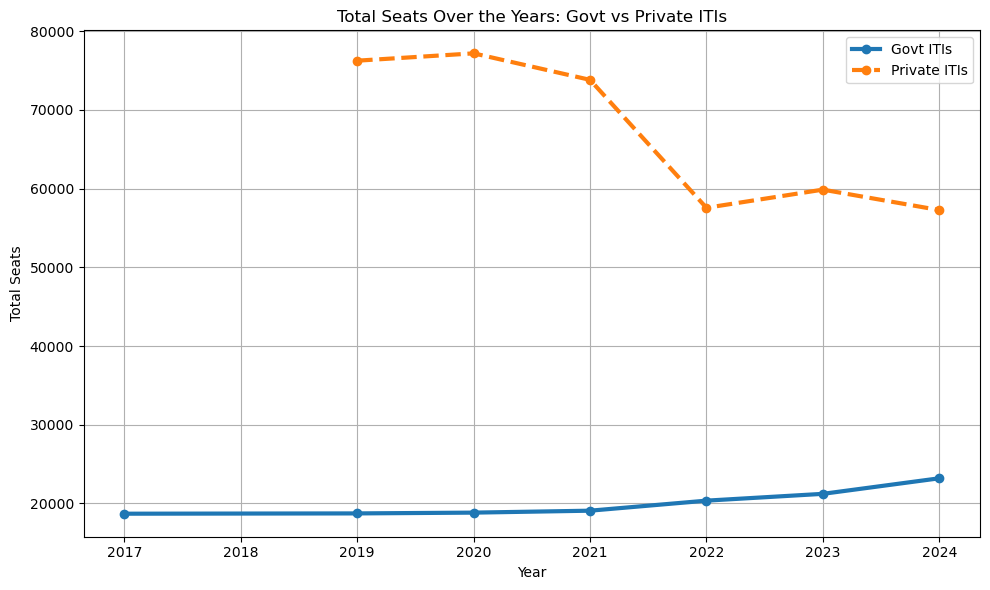

In [ ]:
import matplotlib.pyplot as plt

# Plot with markers
plt.figure(figsize=(10, 6))

plt.plot(govt_yearwise.index, govt_yearwise.values, 
         label='Govt ITIs', linewidth=3, marker='o')

plt.plot(pvt_yearwise.index, pvt_yearwise.values, 
         label='Private ITIs', linestyle='--', linewidth=3, marker='o')

plt.title('Total Seats Over the Years: Govt vs Private ITIs')
plt.xlabel('Year')
plt.ylabel('Total Seats')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


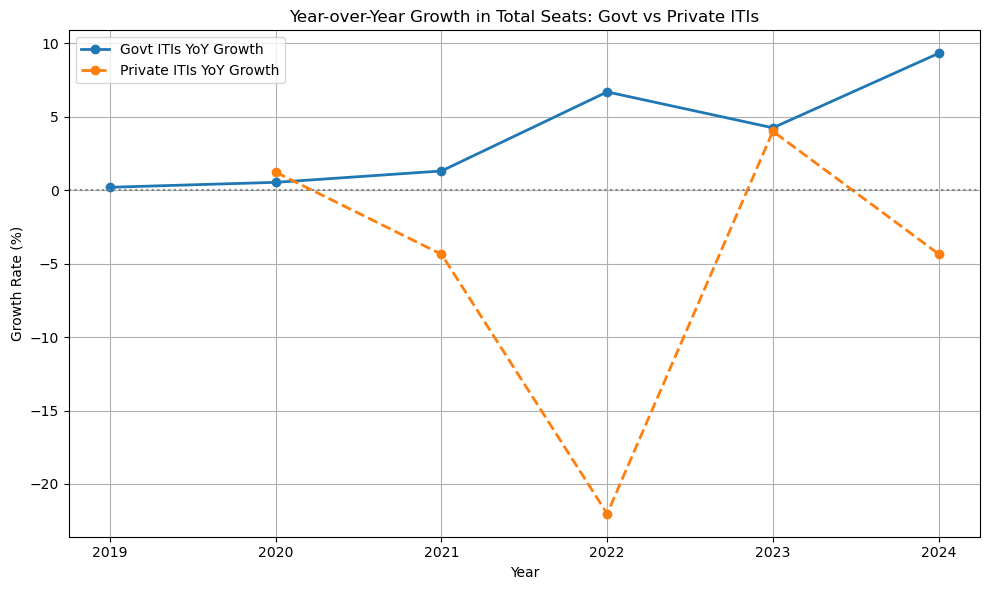

In [ ]:
# Calculate YoY growth rates
govt_growth = govt_yearwise.pct_change() * 100
private_growth = pvt_yearwise.pct_change() * 100

# Plot YoY growth
plt.figure(figsize=(10, 6))
plt.plot(govt_growth.index, govt_growth.values, marker='o', linewidth=2, label='Govt ITIs YoY Growth')
plt.plot(private_growth.index, private_growth.values, marker='o', linestyle='--', linewidth=2, label='Private ITIs YoY Growth')

plt.axhline(0, color='gray', linestyle=':')
plt.title('Year-over-Year Growth in Total Seats: Govt vs Private ITIs')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# make a function to write/print the output for govt and private institute one by one
# save the output in the excel file with two sheet

In [ ]:
seats_govt.head()

,Institute_Name,Total Seats,Total Applicants,Available Seats
0,"ITI Berhampur, Ganjam",13204,27438,-14234
5,ITI Balasore,5344,15778,-10434
1,ITI Cuttack,9781,18168,-8387
2,"ITI Rourkela, Sunderagarh",7666,15530,-7864
3,"ITI Hirakud, Sambalpur",6030,11261,-5231


In [ ]:
seats_pvt.head()

,Institute_Name,Total Seats,Total Applicants,Available Seats
0,"ITI Berhampur, Ganjam",13204,27438,-14234
5,ITI Balasore,5344,15778,-10434
1,ITI Cuttack,9781,18168,-8387
2,"ITI Rourkela, Sunderagarh",7666,15530,-7864
3,"ITI Hirakud, Sambalpur",6030,11261,-5231


In [ ]:
# define a function to filter the data by institute typpe

def compute_seat_summary_by_district(df, iti_enrollment, institute_type=None):
    """
    Computes district-level seat availability summary for Govt and Private ITIs.

    Parameters:
        df (DataFrame): Applicant data (with 'Option_No', 'reported_district', 'type_of_institute')
        iti_enrollment (DataFrame): Seat data with 'reported_district', 'type_of_institute', 'strength'
        institute_type (str or None): If 'Govt.' or 'Pvt.', returns only that type's summary

    Returns:
        - govt_df and pvt_df (if institute_type is None)
        - only one DataFrame (if institute_type is specified)
    """
    # Total Seats from iti_enrollment
    seats_by_district_type = (
        iti_enrollment
        .groupby(['reported_district', 'type_of_institute'])['strength']
        .sum()
        .reset_index()
        .rename(columns={
            'reported_district': 'District',
            'type_of_institute': 'Institute Type',
            'strength': 'Total Seats'
        })
    )

    # Total Applicants from df (Option 1 only)
    applicants_by_district_type = (
        df[df['Option_No'] == 1]
        .groupby(['reported_district', 'type_of_institute'])['aadhar_no']
        .nunique()
        .reset_index()
        .rename(columns={
            'reported_district': 'District',
            'type_of_institute': 'Institute Type',
            'aadhar_no': 'Total Applicants'
        })
    )

    # Merge seats and applicants
    district_summary = pd.merge(
        seats_by_district_type,
        applicants_by_district_type,
        on=['District', 'Institute Type'],
        how='outer'
    ).fillna(0)

    # Calculate Available Seats
    district_summary['Available Seats'] = (
        district_summary['Total Seats'] - district_summary['Total Applicants']
    )

    # Split into two separate tables
    govt_df = district_summary[district_summary['Institute Type'] == 'Govt.'].sort_values(by='District')
    pvt_df = district_summary[district_summary['Institute Type'] == 'Pvt.'].sort_values(by='District')

    return govt_df, pvt_df


In [ ]:
govt_summary, pvt_summary = compute_seat_summary_by_district(df, iti_enrollment)

# Optional: preview in console
print("\n--- Govt ITIs Seat Summary by District ---")
print(govt_summary.to_string(index=False))

print("\n--- Private ITIs Seat Summary by District ---")
print(pvt_summary.to_string(index=False))



--- Govt ITIs Seat Summary by District ---
     District Institute Type  Total Seats  Total Applicants  Available Seats
        Angul          Govt.         4330              3114             1216
     Balasore          Govt.         5344              4890              454
     Baragarh          Govt.         2264              2200               64
      Bhadrak          Govt.          456               320              136
     Bolangir          Govt.         4729              3314             1415
        Boudh          Govt.         2162              1367              795
      Cuttack          Govt.        12700              8765             3935
      Deogarh          Govt.          768               724               44
    Dhenkanal          Govt.         3077              1928             1149
     Gajapati          Govt.         1819              1130              689
       Ganjam          Govt.        27114             22044             5070
Jagatsinghpur          Govt.    

In [ ]:
import pandas as pd
import os

# Get the summaries using your function
govt_summary, pvt_summary = compute_seat_summary_by_district(df, iti_enrollment)

# Define the path where the Excel file will be saved
output_folder = r"C:\Users\Admin\Desktop\Institute Analysis"
output_filename = "district_seat_summary.xlsx"
output_path = os.path.join(output_folder, output_filename)

# Save both summaries to an Excel file with two sheets
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    govt_summary.to_excel(writer, sheet_name='Govt ITIs', index=False)
    pvt_summary.to_excel(writer, sheet_name='Private ITIs', index=False)

print(f"Excel file saved successfully at:\n{output_path}")


Excel file saved successfully at:
C:\Users\Admin\Desktop\Institute Analysis\district_seat_summary.xlsx


In [ ]:
# Total Seats from iti_enrollment
seats_by_district_type = (
    iti_enrollment
    .groupby(['reported_district', 'type_of_institute'])['strength']
    .sum()
    .reset_index()
    .rename(columns={
        'reported_district': 'District',
        'type_of_institute': 'Institute Type',
        'strength': 'Total Seats'
    })
)

# Total Applicants from df
applicants_by_district_type = (
    df[df['Option_No'] == 1]  # consider first preference
    .groupby(['reported_district', 'type_of_institute'])['aadhar_no']
    .nunique()
    .reset_index()
    .rename(columns={
        'reported_district': 'District',
        'type_of_institute': 'Institute Type',
        'aadhar_no': 'Total Applicants'
    })
)

# Merge seats and applicants
district_summary = pd.merge(
    seats_by_district_type,
    applicants_by_district_type,
    on=['District', 'Institute Type'],
    how='outer'
).fillna(0)

# Calculate Available Seats
district_summary['Available Seats'] = district_summary['Total Seats'] - district_summary['Total Applicants']

#Sort for readability
district_summary = district_summary.sort_values(by=['District', 'Institute Type'])
print(district_summary.to_string(index=False))


     District Institute Type  Total Seats  Total Applicants  Available Seats
        Angul          Govt.         4330              3114             1216
        Angul           Pvt.        29408              2906            26502
     Balasore          Govt.         5344              4890              454
     Balasore           Pvt.        42282              2415            39867
     Baragarh          Govt.         2264              2200               64
     Baragarh           Pvt.         6000              1338             4662
      Bhadrak          Govt.          456               320              136
      Bhadrak           Pvt.        25384              1988            23396
     Bolangir          Govt.         4729              3314             1415
     Bolangir           Pvt.         4024              1287             2737
        Boudh          Govt.         2162              1367              795
        Boudh           Pvt.          620               109              511

In [ ]:
# Total Seats by Institute
seats_by_institute = (
    iti_enrollment
    .groupby(['Institute', 'reported_district', 'type_of_institute'])['strength']
    .sum()
    .reset_index()
    .rename(columns={
        'reported_district': 'District',
        'type_of_institute': 'Institute Type',
        'strength': 'Total Seats'
    })
)
# Total Applicants by Institute (only first preferences)
applicants_by_institute = (
    df[df['Option_No'] == 1]
    .groupby(['Institute', 'reported_district', 'type_of_institute'])['aadhar_no']
    .nunique()
    .reset_index()
    .rename(columns={
        'reported_district': 'District',
        'type_of_institute': 'Institute Type',
        'aadhar_no': 'Total Applicants'
    })
)
# Merge on Institute + District + Type
institute_summary = pd.merge(
    seats_by_institute,
    applicants_by_institute,
    on=['Institute', 'District', 'Institute Type'],
    how='outer'
).fillna(0)

# Calculate Available Seats
institute_summary['Available Seats'] = institute_summary['Total Seats'] - institute_summary['Total Applicants']
# Sort for readability
institute_summary = institute_summary.sort_values(by=['District', 'Institute Type', 'Institute'])
print(institute_summary.to_string(index=False))

                                                            Institute      District Institute Type  Total Seats  Total Applicants  Available Seats
                                                    CIPET Private ITI         Angul          Govt.          0.0               2.0             -2.0
                                                      Govt ITI, Koira         Angul          Govt.          0.0               1.0             -1.0
                                                 Govt. ITI, Athamalik         Angul          Govt.        144.0              82.0             62.0
                                                   Govt. ITI, Banspal         Angul          Govt.          0.0               1.0             -1.0
                                         Govt. ITI, Parjang,Dhenkanal         Angul          Govt.          0.0              22.0            -22.0
                                                       Guru Krupa ITC         Angul          Govt.          0.0       

## Supply Demand by the institute

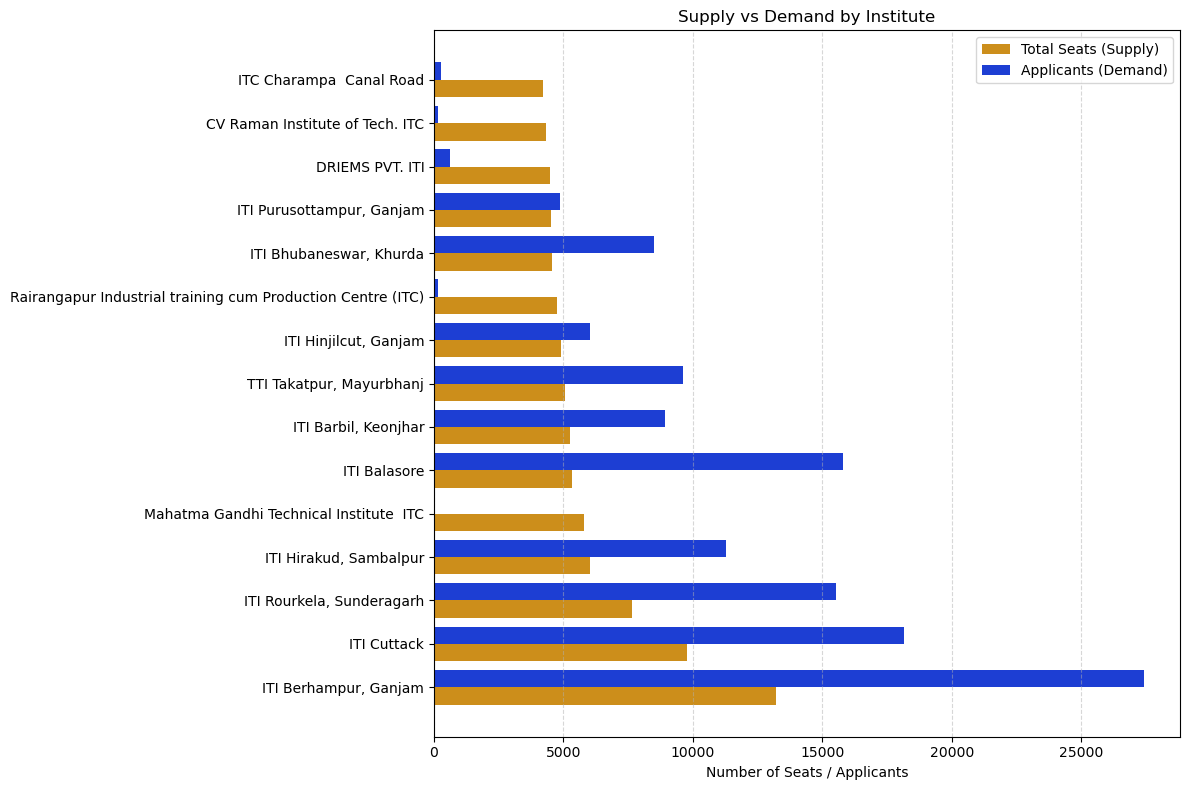

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort top 15 for readability (adjust as needed)
df_plot = seats_available_institute.sort_values(by='Total Seats', ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 8))
bar_width = 0.4
indices = range(len(df_plot))

color_demand = "#1D3ED3"  
color_supply = "#CC8E1B"  


# Plot total seats (supply)
plt.barh(indices, df_plot['Total Seats'], height=bar_width, label='Total Seats (Supply)', color= color_supply)

# Plot total applicants (demand)
plt.barh([i + bar_width for i in indices], df_plot['Total Applicants'], height=bar_width, label='Applicants (Demand)', color= color_demand)

# Y-axis labels (institute names)
plt.yticks([i + bar_width / 2 for i in indices], df_plot['Institute_Name'])

# Labels and title
plt.xlabel('Number of Seats / Applicants')
plt.title('Supply vs Demand by Institute')
plt.legend()

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


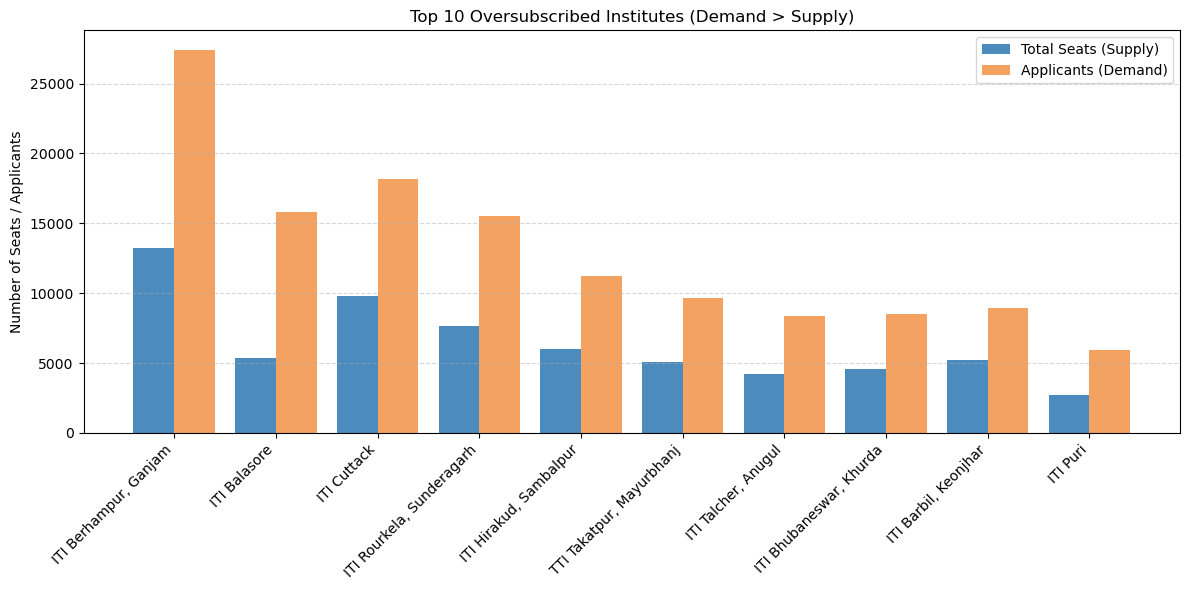

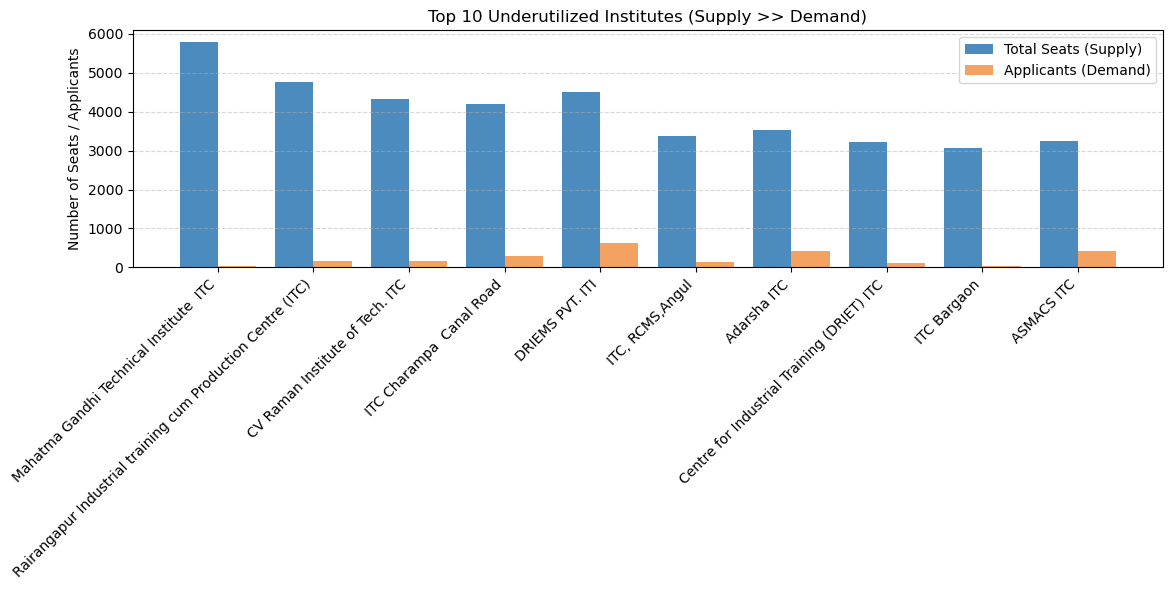

In [ ]:
import matplotlib.pyplot as plt

# Sort to get top 10 oversubscribed (negative availability)
oversubscribed = seats_available_institute[seats_available_institute['Available Seats'] < 0] \
    .sort_values(by='Available Seats').head(10)

# Sort to get top 10 underutilized (high surplus)
underutilized = seats_available_institute[seats_available_institute['Available Seats'] > 0] \
    .sort_values(by='Available Seats', ascending=False).head(10)

# Define plot colors
color_supply = '#4B8BBE'   # muted blue
color_demand = '#F4A261'   # muted orange
bar_width = 0.4

# ----------- Plot 1: Oversubscribed Institutes -----------
plt.figure(figsize=(12, 6))
indices = range(len(oversubscribed))

plt.bar([i - bar_width/2 for i in indices], oversubscribed['Total Seats'], width=bar_width,
        label='Total Seats (Supply)', color=color_supply)
plt.bar([i + bar_width/2 for i in indices], oversubscribed['Total Applicants'], width=bar_width,
        label='Applicants (Demand)', color=color_demand)

plt.xticks(indices, oversubscribed['Institute_Name'], rotation=45, ha='right')
plt.ylabel('Number of Seats / Applicants')
plt.title('Top 10 Oversubscribed Institutes (Demand > Supply)')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# ----------- Plot 2: Underutilized Institutes -----------
plt.figure(figsize=(12, 6))
indices = range(len(underutilized))

plt.bar([i - bar_width/2 for i in indices], underutilized['Total Seats'], width=bar_width,
        label='Total Seats (Supply)', color=color_supply)
plt.bar([i + bar_width/2 for i in indices], underutilized['Total Applicants'], width=bar_width,
        label='Applicants (Demand)', color=color_demand)

plt.xticks(indices, underutilized['Institute_Name'], rotation=45, ha='right')
plt.ylabel('Number of Seats / Applicants')
plt.title('Top 10 Underutilized Institutes (Supply >> Demand)')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


We have significant demand pressure in a few public ITIs, while many private ITIs operate well below capacity. Rationalizing intake and improving quality alignment is essential


In [ ]:
# Combine gov and private data
govt_institutes_df['Type'] = 'Govt'
private_institutes_df['Type'] = 'Private'
combined = pd.concat([govt_institutes_df, private_institutes_df])

# Aggregate
summary = combined.groupby('Type')[['Total Seats', 'Total Applicants']].sum().reset_index()
summary['Available Seats'] = summary['Total Seats'] - summary['Total Applicants']

# Bar chart
summary.plot(
    x='Type', kind='bar',
    stacked=False, figsize=(8, 5),
    title='Govt vs Private: Seats, Applicants & Availability'
)


KeyError: "Columns not found: 'Total Seats', 'Total Applicants'"

In [ ]:
# Merge seats and applicants (year-wise)
combined = pd.merge(
    seats_by_institute,
    ranked_institute,
    on='Institute',
    suffixes=('_seats', '_applicants'),
    how='inner'
)

# Get year columns
years = [col for col in seats_by_institute.columns if col not in ['Institute_Name', 'Total Seats']]

# Compute available seats for each year
for year in years:
    seats_col = f"{year}_seats"
    apps_col = f"{year}_applicants"
    avail_col = f"{year}_available"
    
    combined[avail_col] = combined[f"{year}_seats"] - combined[f"{year}_applicants"]
    combined[avail_col] = combined[avail_col].clip(lower=0)

# Compute total available seats
combined['Available Seats'] = combined['Total Seats'] - combined['Applicants']
combined['Available Seats'] = combined['Available Seats'].clip(lower=0)

# rereorder columns to keep it clean
base_cols = ['Institute_Name', 'Total Seats', 'Applicants', 'Available Seats']
year_cols = []
for year in years:
    year_cols += [f"{year}_seats", f"{year}_applicants", f"{year}_available"]

final_availability_df = combined[base_cols + year_cols]

#  Sort by total available seats
final_availability_df = final_availability_df.sort_values(by='Applicants', ascending=False)
print(final_availability_df.to_string(index=False))


KeyError: 'Institute_seats'

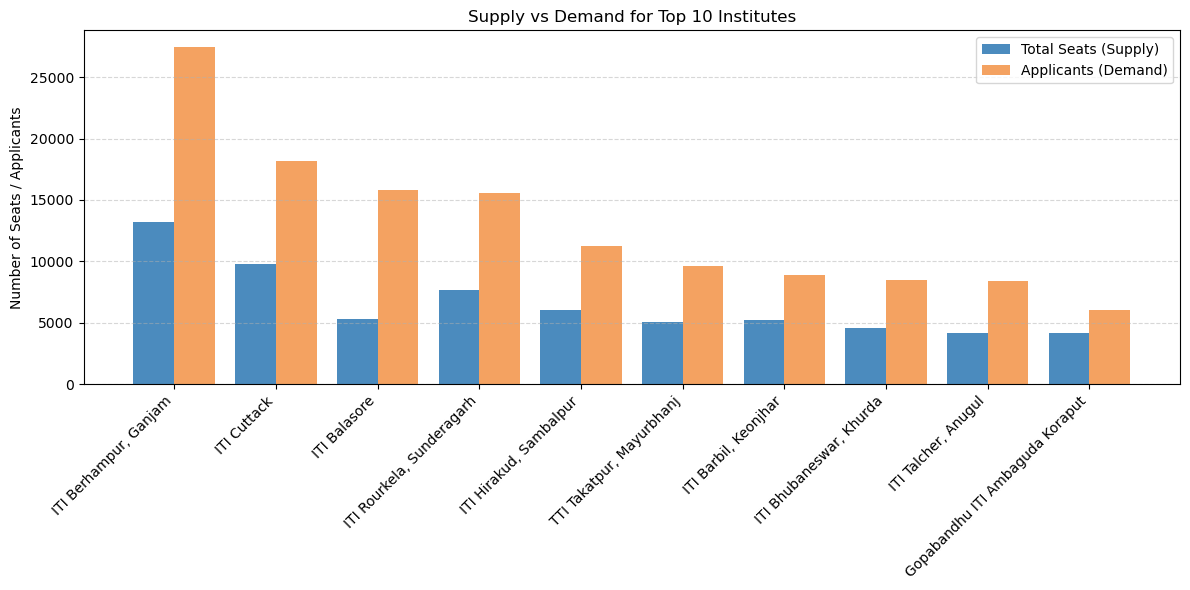

In [ ]:
import matplotlib.pyplot as plt

# Get top 10 institutes by applicants
top10_df = final_availability_df.sort_values(by='Applicants', ascending=False).head(10)

#Set figure and colors
plt.figure(figsize=(12, 6))
bar_width = 0.4
indices = range(len(top10_df))

color_supply = '#4B8BBE'   # Muted blue
color_demand = '#F4A261'   # Muted orange

#  Plot bars
plt.bar([i - bar_width/2 for i in indices], top10_df['Total Seats'], width=bar_width,
        label='Total Seats (Supply)', color=color_supply)
plt.bar([i + bar_width/2 for i in indices], top10_df['Applicants'], width=bar_width,
        label='Applicants (Demand)', color=color_demand)

#  Labels
plt.xticks(indices, top10_df['Institute_Name'], rotation=45, ha='right')
plt.ylabel('Number of Seats / Applicants')
plt.title('Supply vs Demand for Top 10 Institutes')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


In [ ]:
# Define the full path to save
output_path = r"C:\Users\Admin\Documents\seat_available_report.xlsx"

# Save both DataFrames into separate sheets
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    seats_available_institute.to_excel(writer, sheet_name='By Institute', index=False)
    seats_available_trade.to_excel(writer, sheet_name='By Trade', index=False)


## Demand frame

In [ ]:
# applicaton counts for institute_name and trade over each years
applications = (
    df[df['Institute_Name'].notna() & df['Trade'].notna()]
    .groupby(['aadhar_no','year','Institute_Name', 'Trade'])
    .agg(applications=('aadhar_no', 'count'))
    .reset_index()
    .sort_values(by=['year', 'applications'], ascending=[True, False])  
)
applications.head(10)

,aadhar_no,year,Institute_Name,Trade,applications
173954,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,2017,"ITI Berhampur, Ganjam",Electrician (NSQF),351
173956,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,2017,"ITI Berhampur, Ganjam",Fitter (NSQF),303
173930,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,2017,"ITI Barbil, Keonjhar",Electrician (NSQF),257
173955,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,2017,"ITI Berhampur, Ganjam",Electronics Mechanic (NSQF),245
173932,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,2017,"ITI Barbil, Keonjhar",Fitter (NSQF),233
173960,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,2017,"ITI Berhampur, Ganjam",Machinist (NSQF),232
174021,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,2017,ITI Cuttack,Electrician (NSQF),214
173971,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,2017,"ITI Berhampur, Ganjam",Turner (NSQF),212
174023,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,2017,ITI Cuttack,Fitter (NSQF),199
174059,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,2017,"ITI Hirakud, Sambalpur",Electrician (NSQF),196


In [ ]:
# calculate the count of the enrollment by looking into reported_institute and reported_branch_or_trade
enrollment = (
    df[df['reported_institute'].notna() & df['reported_branch_or_trade'].notna()]
    .groupby(['aadhar_no','year', 'reported_institute', 'reported_branch_or_trade'])
    .agg(enrollment = ('aadhar_no','nunique'))
    .reset_index()
    .sort_values(by=['year','enrollment'], ascending = [True, False])    
)

enrollment.head(10)

,aadhar_no,year,reported_institute,reported_branch_or_trade,enrollment
8,++4p8gURJDWrN27AmbMul7sCp4oVRtQnEIoFZhyULN4=,2017,ITI Bargarh,Fitter (NSQF),1
20,++Dgwl2JgXIDRJKAEKhnxzhdsk0MSAfRdHEeH4CubWs=,2017,ITI Bolangir,Fitter (NSQF),1
62,++t1fsBh8fGz3gdlBjrFik9YGck8drXDsNYbiMs3gh4=,2017,"ITI Hinjilcut, Ganjam",Computer Operator and Programming Assistant (N...,1
72,+/+OYN9W2CWh7jqxz5xE/op4QM6OGTYFEad5JEXMUfo=,2017,ITI Dhenkanal,Electronics Mechanic (NSQF),1
147,+/jG/2geJfGUSWjq1btxwFSQlNMMjGZPd8Xm45wUAzM=,2017,Gopabandhu ITI Ambaguda Koraput,Draughtsman (Civil) (NSQF),1
223,+0f70KDeDjIF71P+JBEP0tjZMT98PPV2E2tlDElXgHk=,2017,"Madhusudan ITI, Cuttack",Sewing Technology (NSQF),1
250,+17u1i87iMbNgGdpjqpNxqy/om2vmVzf2Yuc/AcldJo=,2017,ITI Malkangiri,Welder (NSQF),1
264,+1Evz7Anh4D6MQctIDoK1R9TNPnCGYqXkE7AFr8hawg=,2017,"ITI Purusottampur, Ganjam",Fitter (NSQF),1
297,+1dF+ZzWfc0KEJ2zG0HP3EsoSulNd+olckzGfJbaBWo=,2017,"ITI Barbil, Keonjhar",Welder (NSQF),1
302,+1fmNw4moe+uRGRg4U0X2Typalsfp1mThCAesXxZPDE=,2017,ITI Malkangiri,Wireman (NSQF),1


In [ ]:
# see the institute-trade combinations by year where sams_code is not null

institute_trade_combinations = (
    df[df['sams_code'].notna()]
    .groupby(['year', 'reported_institute','reported_branch_or_trade','Institute_Name', 'Trade'])
    .size()
    .reset_index(name='count')  
)
institute_trade_combinations.sort_values(by=['year', 'count'], ascending=[True, False], inplace=True)
institute_trade_combinations.head(10)


,year,reported_institute,reported_branch_or_trade,Institute_Name,Trade,count
1699,2017,"ITI Berhampur, Ganjam",Fitter (NSQF),"ITI Berhampur, Ganjam",Fitter (NSQF),328
1556,2017,"ITI Berhampur, Ganjam",Electrician (NSQF),"ITI Berhampur, Ganjam",Electrician (NSQF),312
3371,2017,ITI Cuttack,Electrician (NSQF),ITI Cuttack,Electrician (NSQF),257
3527,2017,ITI Cuttack,Fitter (NSQF),ITI Cuttack,Fitter (NSQF),254
1697,2017,"ITI Berhampur, Ganjam",Fitter (NSQF),"ITI Berhampur, Ganjam",Electrician (NSQF),238
6083,2017,"ITI Purusottampur, Ganjam",Fitter (NSQF),"ITI Purusottampur, Ganjam",Fitter (NSQF),214
6040,2017,"ITI Purusottampur, Ganjam",Electrician (NSQF),"ITI Purusottampur, Ganjam",Electrician (NSQF),197
1557,2017,"ITI Berhampur, Ganjam",Electrician (NSQF),"ITI Berhampur, Ganjam",Electronics Mechanic (NSQF),191
1558,2017,"ITI Berhampur, Ganjam",Electrician (NSQF),"ITI Berhampur, Ganjam",Fitter (NSQF),189
1703,2017,"ITI Berhampur, Ganjam",Fitter (NSQF),"ITI Berhampur, Ganjam",Machinist (NSQF),169


In [ ]:
#calculate the application count and enrollment for non empty reported_institute by trade over the years 
#def a fucntion to make a table 
def demand_frame(df):
    demand_df = df[df['reported_institute'].notna()]
    demand_df = demand_df.groupby(['Trade', 'year','reported_institute']).agg(
        application_count = ('aadhar_no', 'count'),
        iti_enrollment = ('sams_code', 'nunique')
    ).reset_index()
    demand_df = demand_df.sort_values(by=[ 'year'], ascending=[True])
    return demand_df

demand_df = demand_frame(df)
demand_df.head()

,Trade,year,reported_institute,application_count,iti_enrollment
24190,Stenographer & Secretarial Assistant (English)...,2017,"ITI Berhampur, Ganjam",152,1
3585,Electrical Sector (CoE),2017,ITI Balasore,314,1
20803,Plumber (NSQF),2017,"ITI Purusottampur, Ganjam",87,1
20802,Plumber (NSQF),2017,"ITI Phulbani, Kandhamal",106,1
20801,Plumber (NSQF),2017,ITI Malkangiri,34,1


# Visualisation of both the rankings

In [ ]:
import plotly.graph_objects as go

# Select top N institutes
top_n = 10
top_institutes = ranked_institute.head(top_n).set_index('Institute_Name')

# Identify year columns
year_columns = [col for col in top_institutes.columns if isinstance(col, int)]
years = sorted(year_columns)

# Create the figure
fig = go.Figure()

# Add a line for each institute
for institute in top_institutes.index:
    fig.add_trace(go.Scatter(
        x=years,
        y=top_institutes.loc[institute, years],
        mode='lines+markers',
        name=institute
    ))

# Customize layout
fig.update_layout(
    title="Institute-Wise Applicant Trends Over Years",
    xaxis_title="Year",
    yaxis_title="Number of Applicants",
    legend_title="Institute",
    height=600,
    hovermode="x unified"
)

#Show the plot
fig.show()


In [ ]:
# Select top N trades
top_trades = ranked_trade.head(top_n).set_index('Trade')

# Identify year columns
year_columns = [col for col in top_trades.columns if isinstance(col, int)]
years = sorted(year_columns)

# Create the figure
fig = go.Figure()

# Add a line for each trade
for trade in top_trades.index:
    fig.add_trace(go.Scatter(
        x=years,
        y=top_trades.loc[trade, years],
        mode='lines+markers',
        name=trade
    ))

# Customize layout
fig.update_layout(
    title="Trade-Wise Applicant Trends Over Years",
    xaxis_title="Year",
    yaxis_title="Number of Applicants",
    legend_title="Trade",
    height=600,
    hovermode="x unified"
)

#  Show the plot
fig.show()
